# **Proyecto final - Análisis de popularidad en canciones de Spotify**





##**-Integrantes:**

***Equipo***

-Garnica Martínez, Tania Fabiola

-Prandini, Santiago

-Vadra, Sebastián

***Comisión 29730, Coderhouse Data Science***

`-Profesor:` Damián Dapueto

`-Tutor:` Fernando Trujillo Arévalo

##**-Tema de investigación**

* Ninguna empresa u organización ha avanzado tanto en la tarea de representar cuantitativamente a la música como Spotify.

* Con una participación en el mercado del 36% para el 2018, cuenta con un almacén de datos muy superior al del resto de sus competidores.

* A partir de esta base de datos con canciones que fueron top entre 1998 y 2020, se busca conocer si existe un algoritmo capaz de predecir la popularidad que tendrá una canción a través de sus atributos

* En caso de tener éxito, se analizará aquellos factores que hacen que una canción sea popular.

##**-Historia de los datos**

* Este conjunto de datos contiene estadísticas de audio de las 2000 mejores pistas en Spotify de 2000 a 2019. 

* Los datos contienen alrededor de 18 columnas, cada una de las cuales describe la pista y sus cualidades.

* Los datos fueron obtenidos de la empresa Kaggle

##**-Problema específico de la investigación**

***Hipótesis:***

* Mediante el análisis y la transformación de los distintos atributos de las canciones, se podrá predecir con cierta confianza el rango de popularidad de una canción, y con un error más elevado su popularidad exacta. 

##**-Objetivos**

***Objetivo general:***

* Comprobar la factibilidad de predecir la popularidad de una canción mediante sus atributos

***Objetivo específicos:***

* Analizar cómo impactan los atributos de una canción en su popularidad, para las canciones top entre 2000 y 2019.
* Realizar un análisis exploratorio sobre distintas características de las canciones.
* Comprender si existen cambios generales a través de los años en los atributos de las canciones top
* Dar sustento meteodológico a los distintos algoritmos utilizados en el proyecto

##**-Preguntas de investigación**

***Pregunta general:***

* ¿Se puede predecir la popularidad de una canción?

***Preguntas específicas:***

* ¿Cómo impactan los atributos de una canción en su popularidad?
* ¿Existen cambios generales a través de los años en los atributos de las canciones top?

##**-Fuente de los datos**

* Los datos fueron obtenidos de la plataforma de Data Science Kaggle

  https://www.kaggle.com/datasets/paradisejoy/top-hits-spotify-from-20002019

##**-Primera vista de la base de datos**

* Importamos la librería pandas para cargar el dataset

In [251]:
import pandas as pd

songs = pd.read_excel('songs_normalize.xlsx')

songs

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5444.0,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4918.0,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9007.0,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4063.0,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4806.0,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5065.0,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop
1995,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5707.0,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop
1996,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8635.0,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country"
1997,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7513.0,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop


##**-Descripción de variables**

•	`artist:` nombre del Artista.

•	`song:` nombre de la Pista.

•	`duration_ms:` duración de la pista (milisegundos)

•	`explicit:` canción inadecuada para menores (0=no, 1=sí)

•	`year:` año de lanzamiento de la pista.

•	`popularity:` mide la popularidad de la canción según cantidad de veces escuchada, pondera las escuchadas más recientemente (de 0 a 100)

•	`danceability:` describe qué tan adecuada es una pista para bailar en función de una combinación de elementos musicales (de 0 a 1)

•	`energy:` representa una medida de intensidad y actividad (de 0 a 1)

•	`key:` representa la nota en la que se encuentra la pista (Do=0, Do#=1, Re=2, Re#=3, Mi=4, Fa=5, Fa#=6, Sol=7, Sol#=8, La=9, La#=10, Si=11)

•	`loudness:` volumen general de una pista(en decibelios dB) 

•	`mode:` indica la modalidad (mayor o menor) de una pista (mayor=1, menor=0)

•	`speechiness:` detecta la presencia de palabras habladas en una pista (de 0 a 1)

•	`acousticness:` una medida de confianza de si la pista es acústica (de 0 a 1)

•	`instrumentalness:` representa si una pista no contiene voces (de 0 a 1)

•	`liveness:` detecta la presencia de una audiencia en la grabación (de 0 a 1)

•	`valence:` describe la positividad musical transmitida por una pista (de 0 a 1)

•	`tempo:` indica el tempo general estimado de una pista (en BPM: pulsaciones por minuto)

•	`genre:` género de la pista.


#**----------------------------------------------------------------------------------------------------**

##**-Limpieza de los datos**

* Los datos obtenidos de la base de datos de kaggle tuvieron que ser modificados en una fila que traía una columna corrida, y la columna que corresponde a tempo tuvo que ser corregida ya que tenía valroes con la coma corrida

#**----------------------------------------------------------------------------------------------------**

##**-Librerías utilizadas en el trabajo**

In [252]:
#para el tratamiento de datos

import numpy as np
import pandas as pd

#para gráficos

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#para preproceso y modelado

from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from lightgbm.sklearn import LGBMRegressor
from lightgbm.sklearn import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector

from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder

from sklearn.datasets import make_regression

from sklearn.inspection import permutation_importance
import multiprocessing

#para métricas
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn import metrics

#otros
import random
import time
from scipy.stats import loguniform



#**----------------------------------------------------------------------------------------------------**

##**Análisis exploratorio**

* Vemos el conjunto de datos

In [253]:
songs

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5444.0,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4918.0,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9007.0,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4063.0,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4806.0,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5065.0,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop
1995,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5707.0,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop
1996,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8635.0,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country"
1997,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7513.0,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop


* Usamos .info para ver la cantidad de registros con los que cuenta nuestro dataset, los tipos de variable de cada columna, y la existencia o no de nulos

In [254]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            1999 non-null   object 
 1   song              1999 non-null   object 
 2   duration_ms       1999 non-null   int64  
 3   explicit          1999 non-null   bool   
 4   year              1999 non-null   int64  
 5   popularity        1999 non-null   int64  
 6   danceability      1999 non-null   float64
 7   energy            1999 non-null   float64
 8   key               1999 non-null   int64  
 9   loudness          1999 non-null   float64
 10  mode              1999 non-null   int64  
 11  speechiness       1999 non-null   float64
 12  acousticness      1999 non-null   float64
 13  instrumentalness  1999 non-null   float64
 14  liveness          1999 non-null   float64
 15  valence           1999 non-null   float64
 16  tempo             1999 non-null   float64


* Nuestro dataset cuenta con 1999 registros y 18 columnas. 

* No contamos con valores nulos en ninguna de las columnas

* Contamos con 5 variables categóricas: artist,
 song,
 genre,
 key,
 year (estas últimas figuran como numéricas)

* Contamos con 2 variables booleanas: mode,
explicit

* Contamos con 11 variables numéricas: duration_ms, popularity, danceability, energy, loudness, speechiness, acousticness, instrumentalness, liveness, valence, tempo       


In [255]:
songs['key'] = songs['key'].astype('object')
songs['mode'] = songs['mode'].astype('bool')


* Usamos .describe para ver las estadísticas de nuestras columnas numéricas, también usamos .T para tener una mejor visión de los resultados

* Buscamos valores duplicados

In [256]:
songs.duplicated().value_counts()

False    1940
True       59
dtype: int64

* Eliminamos valores duplicados

In [257]:
songs.drop_duplicates(inplace=True)

In [258]:
songs.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
artist,1940,835,Drake,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
song,1940,1878,Sorry,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration_ms,1940.0,NaN,NaN,NaN,228600.802062,39259.075778,113000.0,203502.75,223219.5,247976.0,484146.0
explicit,1940,2,False,1403,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,1940.0,NaN,NaN,NaN,2009.516495,5.874591,1998.0,2004.0,2010.0,2015.0,2020.0
popularity,1940.0,NaN,NaN,NaN,59.625773,21.50412,0.0,56.0,65.0,73.0,89.0
danceability,1940.0,NaN,NaN,NaN,0.667795,0.140642,0.129,0.581,0.676,0.765,0.975
energy,1940.0,NaN,NaN,NaN,0.721478,0.152879,0.0549,0.624,0.739,0.84,0.999
key,1940.0,12.0,1.0,257.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loudness,1940.0,NaN,NaN,NaN,-4992.620766,2434.646801,-20514.0,-6338.0,-5080.0,-3838.25,-0.276


* Contamos con muchos valores únicos en dos de nuestras variables categóricas: artist y song, muchos más en la segunda que en la primera.

* Observamos que nuestra variable target 'popularity' tiene un desvío estandar muy alto

* Las variables duration_ms, danceability, energy, loudness, valence y tempo cuentan con una media y una mediana muy similares

* Las variables speechiness, acousticness, instrumentalness y liveness por su parte parecen tener distribuciones más sesgadas

* Como nuestro objetivo es predecir la popularidad de las canciones, comenzamos por analizar la distribución de nuestra variable target realizando un histograma

* Agregamos un par de librerías más para ver mejor aún la correlación

In [259]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [260]:
fig=make_subplots(rows=3,cols=3,subplot_titles=('<i>popularity', '<i>danceability', '<i>energy', '<i>loudness', '<i>speechiness', '<i>acousticness', '<i>liveness', '<i>valence', '<i>tempo'))
fig.add_trace(go.Histogram(x=songs['popularity'],name='popularity'),row=1,col=1)
fig.add_trace(go.Histogram(x=songs['danceability'],name='danceability'),row=1,col=2)
fig.add_trace(go.Histogram(x=songs['energy'],name='energy'),row=1,col=3)
fig.add_trace(go.Histogram(x=songs['loudness'],name='loudness'),row=2,col=1)
fig.add_trace(go.Histogram(x=songs['speechiness'],name='speechiness'),row=2,col=2)
fig.add_trace(go.Histogram(x=songs['acousticness'],name='acousticness'),row=2,col=3)
fig.add_trace(go.Histogram(x=songs['liveness'],name='liveness'),row=3,col=1)
fig.add_trace(go.Histogram(x=songs['valence'],name='valence'),row=3,col=2)
fig.add_trace(go.Histogram(x=songs['tempo'],name='tempo'),row=3,col=3)
fig.update_layout(height=900,width=900,title_text='Distribución de variables')


Text(0, 0.5, 'Frequency')

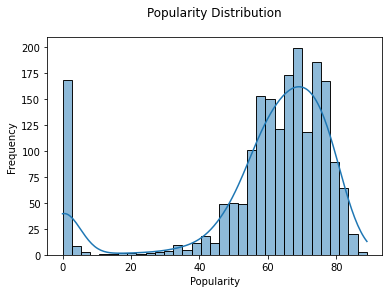

In [261]:
sns.histplot(data=(songs['popularity']), kde=True )

plt.title('Popularity Distribution\n')
plt.xlabel('Popularity')
plt.ylabel('Frequency')

* De la distribución de nuestra variable target vemos que tenemos muchos valores con 0, lo que hace que la curva no tome una forma clara. Desde el valor 40 al máximo (89) se asemeja a una distribución normal. También es para destacar las pocas canciones con popularidad alta (>85)

* Realizamos un boxplot de la variable popularity para chequear la existencia de outliers

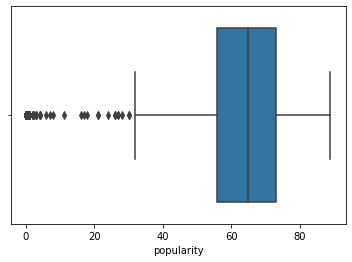

In [262]:
sns.boxplot(x=songs['popularity'])

* Realizamos un gráfico de barras para chequear los valores de popularity que más se repiten en el dataset

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

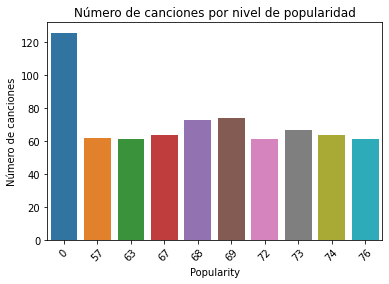

In [263]:
sns.barplot(songs['popularity'].value_counts().head(10).index, songs['popularity'].value_counts().head(10))
plt.title('Número de canciones por nivel de popularidad')
plt.xlabel('Popularity')
plt.ylabel('Número de canciones')
plt.xticks(rotation=45)

* Vemos que el 0 es el valor de 'popularity' que más se repite en el dataset, seguido por los valores de 68 y 69. Las canciones con popularity '0' representan un poco más del 6% del conjunto de datos


* En base a la información obtenida de los gráficos vamos a eliminar los valores de popularity menores a 15 en el dataset por ser outliers.

In [264]:
songs = songs.drop(songs.index[songs['popularity']<15])
songs.shape

(1760, 18)

* Nuestro conjunto se reduce en 181 registros

* Realizamos un pairplot para ver la relación entre algunas de las variables numéricas y sus distribuciones

Text(0.5, 1.02, 'Grafico de puntos en variables numericas')

<Figure size 1440x1440 with 0 Axes>

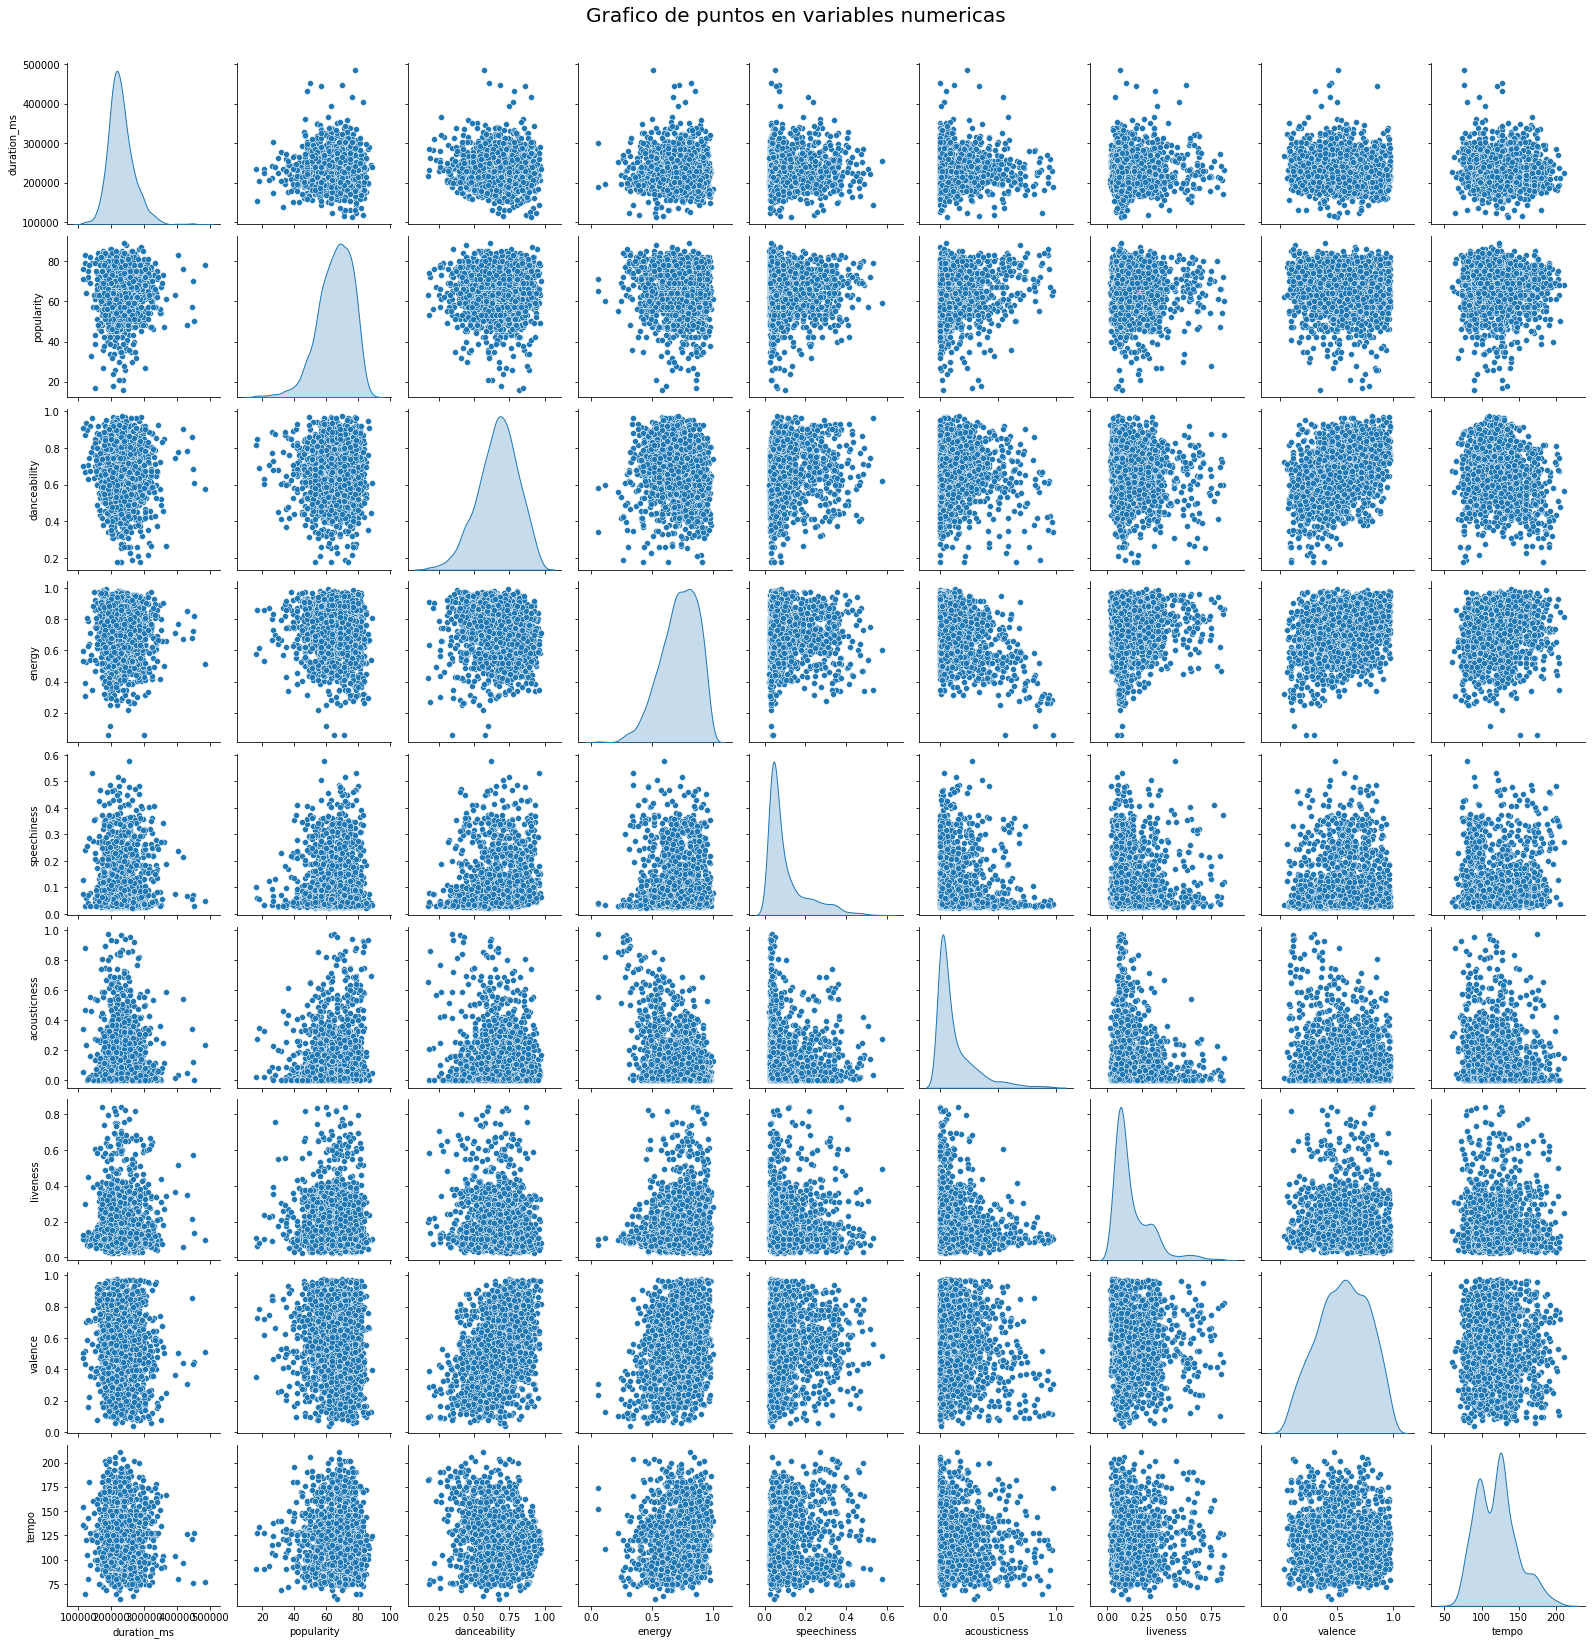

In [265]:
plt.figure(figsize=(20, 20))

g = sns.pairplot(songs[['duration_ms', 'popularity', 'danceability', 'energy', 'speechiness', 'acousticness', 'liveness', 'valence', 'tempo']], diag_kind='kde');

g.fig.suptitle("Grafico de puntos en variables numericas", fontsize=20, y=1.02)

* En esta primera instancia no salen a la luz relaciones lineales claras entre nuestras variables numéricas

* Realizamos un barplot para ver cuáles son los artistas con más canciones en nuetsro dataset

Text(0.5, 0, 'Artista')

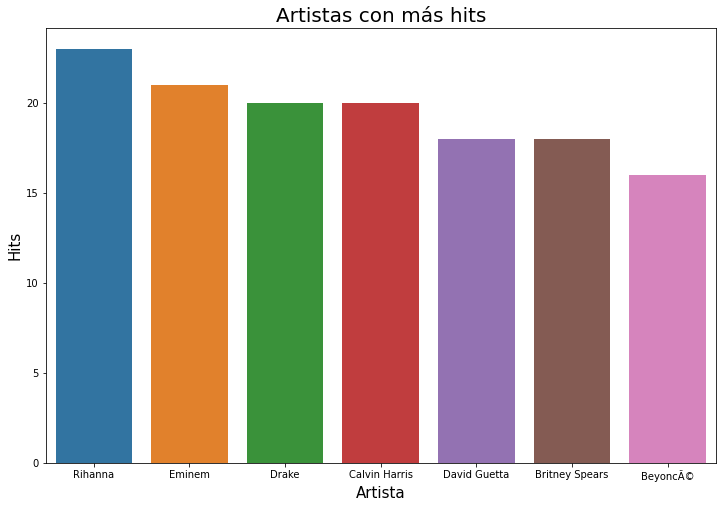

In [266]:
#graficamos los artistas con más hits en la lista de popularidad
plt.figure(figsize=(12,8))
ax = sns.barplot(x=songs['artist'].value_counts().keys()[:7],y=songs['artist'].value_counts().values[:7])

ax.set_title('Artistas con más hits', fontsize=20)
ax.set_ylabel('Hits', fontsize=15)
ax.set_xlabel('Artista', fontsize=15)

* Graficamos los artistas con mayos número de canciones populares

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.



Text(0.5, 0, 'Artist')

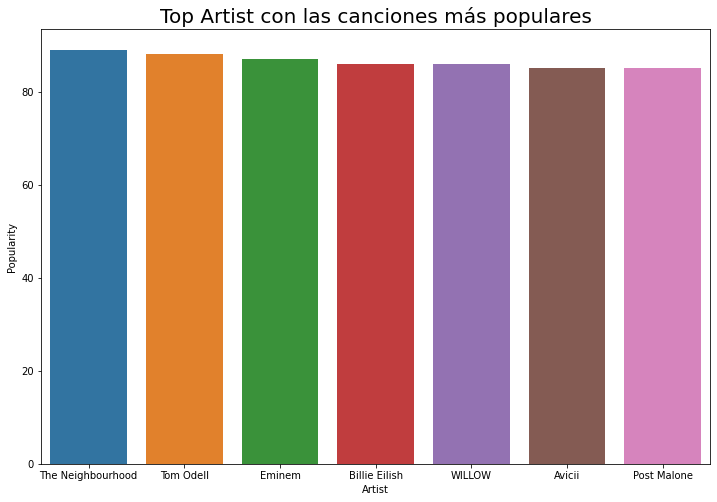

In [269]:
#Graficamos los artistas con mayor número de canciones populares

df_artist_group = songs.groupby(['artist']).max().sort_values(['popularity'], ascending=False)
plt.figure(figsize=(12,8))
ax = sns.barplot(data=df_artist_group.head(7), x=df_artist_group.head(7).index, y='popularity')

ax.set_title('Top Artist con las canciones más populares', fontsize=20)
ax.set_ylabel('Popularity', fontsize=10)
ax.set_xlabel('Artist', fontsize=10)

* Generamos un diagrama de los artistas más populares deg género POP

Text(0.5, 1.0, 'Artistas más populares POP')

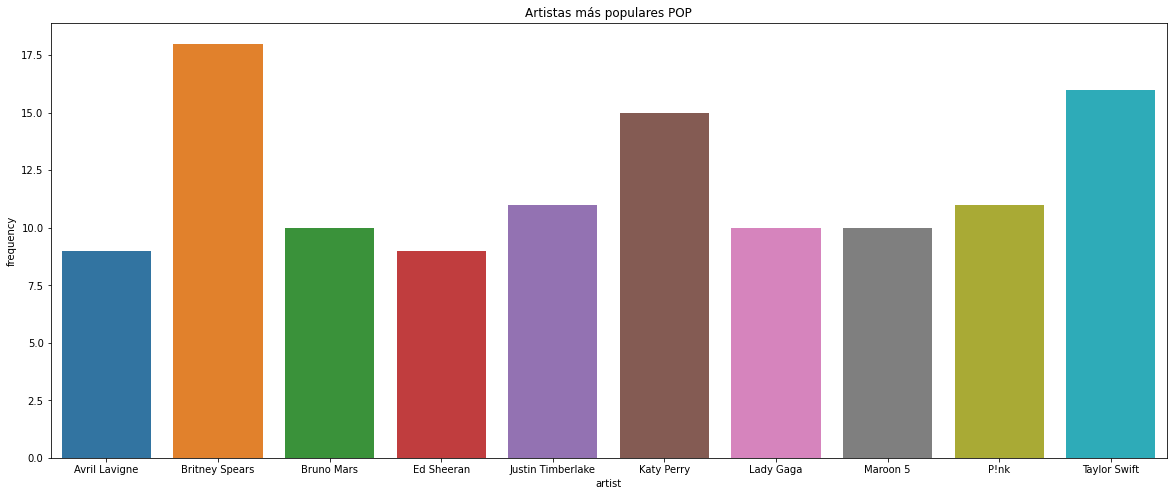

In [270]:
songs_genre = pd.DataFrame(songs[['artist']][songs['genre'] == 'pop'].value_counts(), columns=['frequency'])[:10]
songs_genre.sort_values(by='artist', ascending=True, inplace=True)
songs_genre.reset_index(level=['artist'], inplace=True)
plt.figure(figsize=(20,8))
sns.barplot(data=songs_genre, x='artist',y="frequency")
plt.title("Artistas más populares POP")

Generamos un diagrama de los artistas más populares del género HIP HOP

Text(0.5, 1.0, 'HIP-HOP')

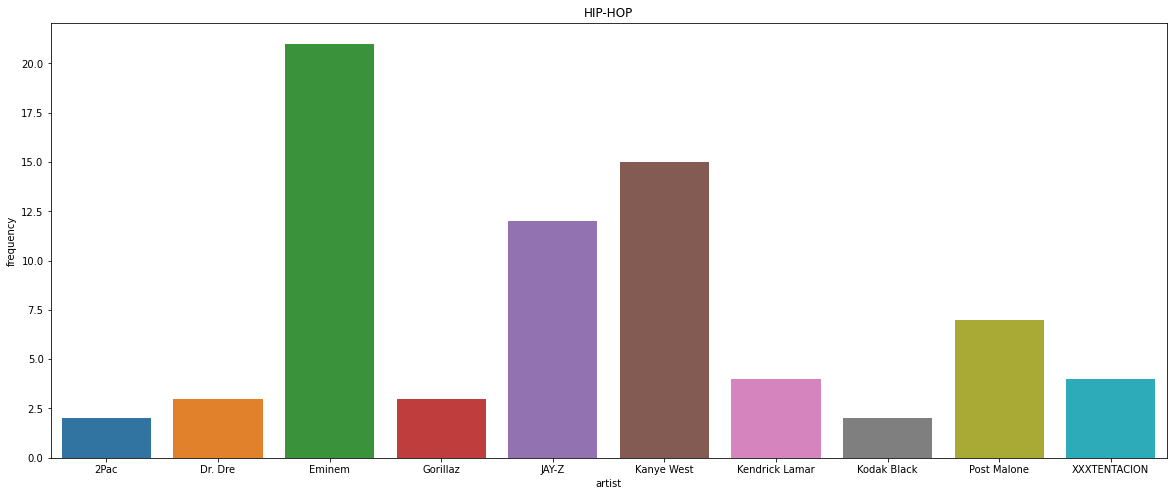

In [271]:
songs_genre = pd.DataFrame(songs[['artist']][songs['genre'] == 'hip hop'].value_counts(), columns=['frequency'])[:10]
songs_genre.sort_values(by='artist', ascending=True, inplace=True)
songs_genre.reset_index(level=['artist'], inplace=True)
plt.figure(figsize=(20,8))
sns.barplot(data=songs_genre, x='artist',y="frequency")
plt.title("HIP-HOP")

* Generamos un diagrama de los artistas más populares deg género ROCK AND METAL

Text(0.5, 1.0, 'Rock and Metal')

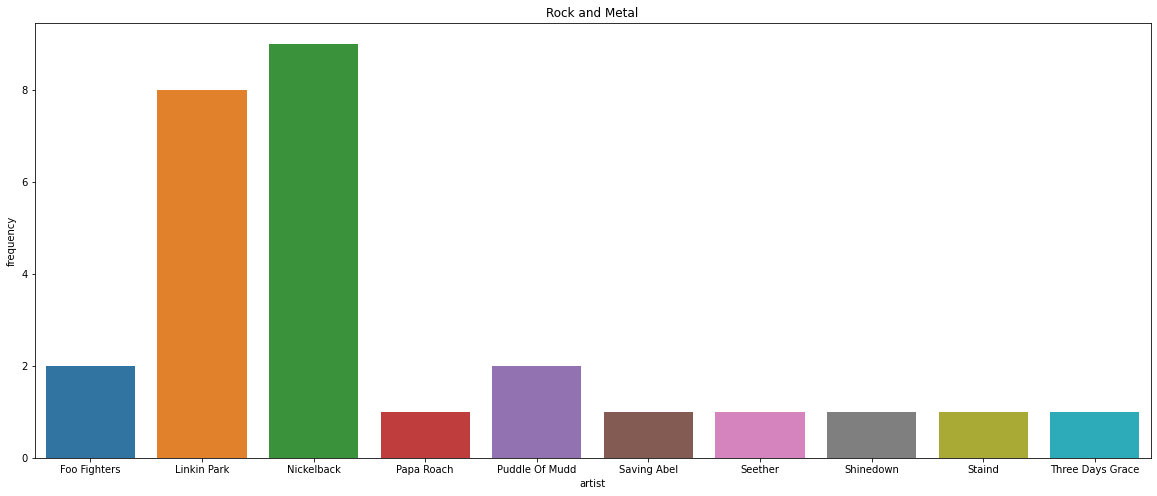

In [272]:
songs_genre = pd.DataFrame(songs[['artist']][songs['genre'] == 'rock, metal'].value_counts(), columns=['frequency'])[:10]
songs_genre.sort_values(by='artist', ascending=True, inplace=True)
songs_genre.reset_index(level=['artist'], inplace=True)
plt.figure(figsize=(20,8))
sns.barplot(data=songs_genre, x='artist',y="frequency")
plt.title("Rock and Metal")

* Para poder aprovechar la columna artista, vamos a reemplazarla por un label que indique cuántas canciones tiene en el dataset el artista en cuestión

In [273]:
#creamos un dataframe que indique la cantidad de canciones por artista
suma_canciones = pd.DataFrame(songs['artist'].value_counts())
suma_canciones


,artist
Rihanna,23
Eminem,21
Drake,20
Calvin Harris,20
David Guetta,18
...,...
Cassie,1
Infernal,1
Cherish,1
Fedde Le Grand,1


In [274]:
#agregamos un diagrama para visualizar mejor los datos
px.bar(songs.groupby('artist',as_index=False).count().sort_values(by='song',ascending=False).head(50),x='artist',y='song',labels={'song':'Total Songs'},width=1000,color_discrete_sequence=['green'],text='song',title='<b> Lista de canciones por artista')

In [275]:
#renombramos la columna artist como 'total de canciones'
suma_canciones2 = suma_canciones.rename(columns={"artist": "total de canciones"})

suma_canciones2

,total de canciones
Rihanna,23
Eminem,21
Drake,20
Calvin Harris,20
David Guetta,18
...,...
Cassie,1
Infernal,1
Cherish,1
Fedde Le Grand,1


In [276]:
#cambiamos el index
suma_canciones3 = suma_canciones2.reset_index()

suma_canciones3

,index,total de canciones
0,Rihanna,23
1,Eminem,21
2,Drake,20
3,Calvin Harris,20
4,David Guetta,18
...,...,...
780,Cassie,1
781,Infernal,1
782,Cherish,1
783,Fedde Le Grand,1


In [277]:
#renombramos la columna index como 'artist'
suma_canciones4 = suma_canciones3.rename(columns={"index": "artist"})

suma_canciones4

,artist,total de canciones
0,Rihanna,23
1,Eminem,21
2,Drake,20
3,Calvin Harris,20
4,David Guetta,18
...,...,...
780,Cassie,1
781,Infernal,1
782,Cherish,1
783,Fedde Le Grand,1


In [278]:
#realizamos un merge entre nuestro dataset original y el de la suma de cancioens para obtener en cada row el dato de cuántas canciones tiene en total el artista en cuestión
songs = songs.merge(suma_canciones4,
                                                on='artist')

songs

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,total de canciones
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5444.00,False,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop,18
1,Britney Spears,Born to Make You Happy,243533,False,1999,58,0.633,0.922,11,-4842.00,False,0.0454,0.1160,0.000465,0.0710,0.686,84.110,pop,18
2,Britney Spears,Lucky,206226,False,2000,65,0.765,0.791,8,-5707.00,True,0.0317,0.2620,0.000154,0.0669,0.966,95.026,pop,18
3,Britney Spears,I'm a Slave 4 U,203600,False,2001,69,0.847,0.843,5,-3579.00,False,0.1060,0.4150,0.000134,0.1070,0.963,110.027,pop,18
4,Britney Spears,Overprotected - Radio Edit,198600,False,2001,61,0.682,0.894,0,-1.73,False,0.0727,0.0381,0.000000,0.4160,0.845,95.992,pop,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1755,Sech,Otro Trago,225933,True,2019,71,0.746,0.700,0,-4669.00,True,0.3410,0.1360,0.000159,0.1100,0.619,176.044,latin,1
1756,NSG,Options,240081,True,2020,57,0.836,0.621,1,-4684.00,False,0.0894,0.3890,0.000092,0.1040,0.762,101.993,"World/Traditional, hip hop",1
1757,Normani,Motivation,193837,False,2019,71,0.599,0.887,4,-3967.00,True,0.0984,0.0192,0.000001,0.3000,0.881,170.918,"pop, R&B",1
1758,Joel Corry,Sorry,188640,False,2019,63,0.744,0.790,8,-4617.00,False,0.0562,0.0547,0.000802,0.3200,0.847,125.002,"pop, Dance/Electronic",1


In [279]:
songs["rango canciones"] = pd.cut(songs["total de canciones"], 
                                                bins=[0,4,9,np.inf],
                                                labels=['0-4','5-9','10+'])

In [280]:
songs['rango canciones'] = songs['rango canciones'].astype('object')

* Realizamos un gráfico para ver cómo es el promedio de popularidad de las canciones seg+un el rango de cantidad de canciones en el dataset

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



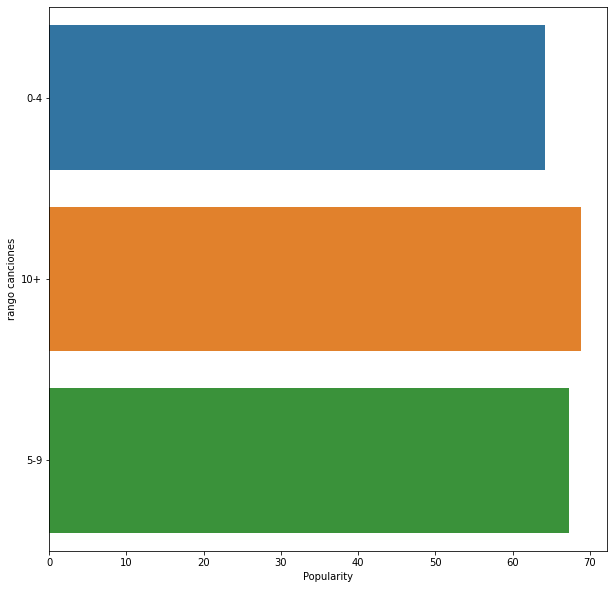

In [281]:
plt.figure(figsize=(10, 10))
rango_canciones = songs.groupby('rango canciones')['popularity'].mean().reset_index()
sns.barplot(rango_canciones['popularity'], rango_canciones['rango canciones'], ci = None)
plt.xlabel('Popularity');

* Vemos que en promedio alcanzan mayor popularidad las canciones de los artistas que tienen más de 10 canciones en el dataset


* Realizamos un barplot con las canciones que mayor "popularity" obtuvieron

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



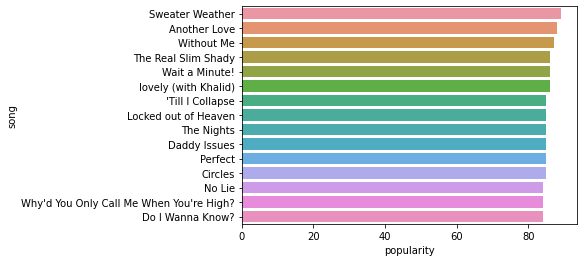

In [139]:
canciones_populares = songs.nlargest(15, ['popularity']).set_index('song')['popularity']
sns.barplot(canciones_populares, canciones_populares.index)

* Esta variable no va a ser tenida en cuenta a la hora de armar el modelo ya que no encontramos transformación posible para utilizarla

* Realizamos un histplot para ver la distribución de la duracion de las canciones

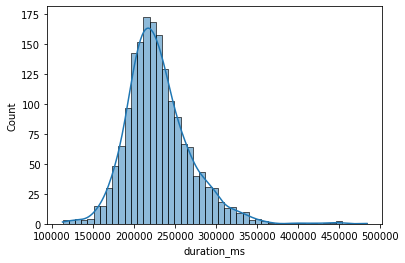

In [282]:
sns.histplot(data=(songs['duration_ms']), kde=True );

* Graficamos el boxplot para duration_ms

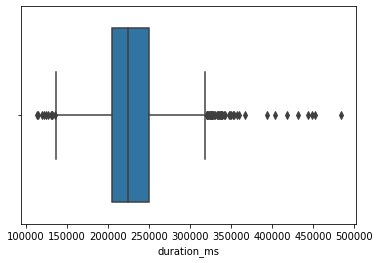

In [283]:
sns.boxplot(x=songs['duration_ms'])

* La distribución de la duración de las canciones se asemeja a una normal, un poco sesgada a la izquierda ya que hay algunas canciones que se acercan a los 5 minutos de duración.

* Eliminamos las canciones que duren más de 380000 segundos. Nuestro conjunto se reduce 8 registros

In [284]:
songs = songs.drop(songs.index[songs['duration_ms']>380000])
songs.shape 

(1752, 20)

* Comparamos ahora en un mismo gráfico la distribción de la variable duración con nuestra variable target "popularity"

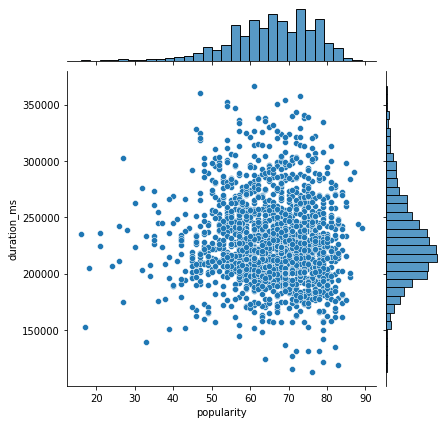

In [285]:
sns.jointplot(x = 'popularity', y = 'duration_ms', data = songs)

* No parece haber relación clara entre la duración de la canción y la popularidad alcanzada, la gran cantidad de valores con popularidad 0 distorsiona el gráfico

* Vamos a crear una nueva variable que nos indique si la canción es bailable o no. Para esto utilizaremos como criterio la variable danceability, completando con 1 las canciones que registren en este índice 0.7 o más, y con 0 el resto.

In [286]:
songs['Bailable'] = [1 if num >= 0.7 else 0 for num in songs['danceability']]

In [287]:
songs.drop(['danceability'],axis=1,inplace=True)

* Chequeamos la distribución de la variable loudness

Text(0, 0.5, 'Frequency')

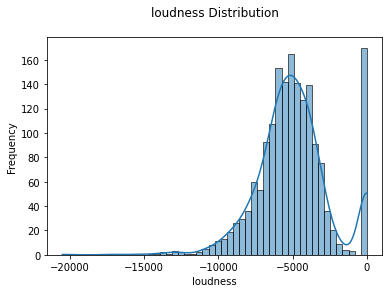

In [146]:
sns.histplot(data=(songs['loudness']), kde=True )

plt.title('loudness Distribution\n')
plt.xlabel('loudness')
plt.ylabel('Frequency')

* Graficamos el boxplot para loudness

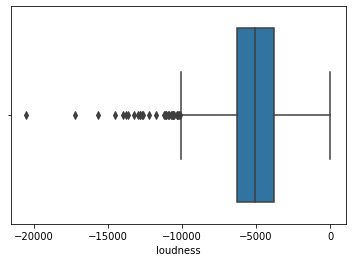

In [288]:
sns.boxplot(x=songs['loudness'])

* Eliminamos los outliers, reduciendo nuestro dataset en 14 registros

In [289]:
songs = songs.drop(songs.index[songs['loudness']<-12000])
songs.shape

(1738, 20)

* Consultamos la distribución de la variable tempo

Text(0, 0.5, 'Frequency')

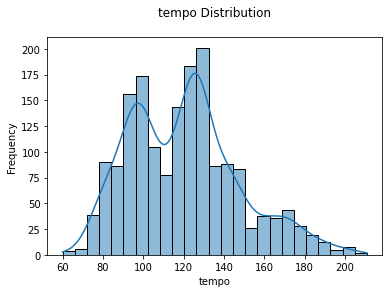

In [290]:
sns.histplot(data=(songs['tempo']), kde=True )

plt.title('tempo Distribution\n')
plt.xlabel('tempo')
plt.ylabel('Frequency')

* Graficamos el boxplot para tempo

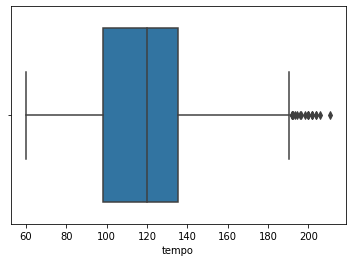

In [291]:
sns.boxplot(x=songs['tempo'])

* No encontramos outliers significativos por lo que no eliminamos ningún registro

* Genereamos un barplot para ver cuales son los géneros que mayor cantidad de canciones presentan en el dataset

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

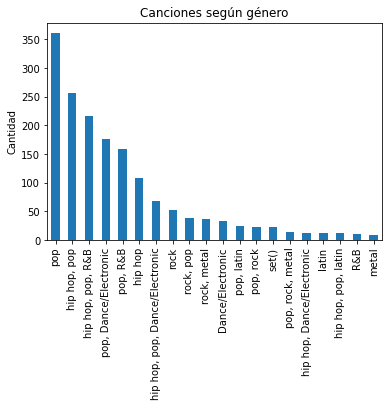

In [292]:
songs['genre'].value_counts().head(20).plot(kind='bar')
plt.title('Canciones según género')
plt.ylabel('Cantidad')
plt.xticks(rotation = 90)

* Creamos una tabla de frecuencia para ver el total de los géneros y su cantidad de canciones en el dataset

In [293]:
#instalamos sidetable para ver la frecuencia por género
!pip install sidetable

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [153]:
import sidetable
songs.stb.freq(['genre']).sort_values('cumulative_percent')

,genre,count,percent,cumulative_count,cumulative_percent
0,pop,361,20.771001,361,20.771001
1,"hip hop, pop",256,14.729574,617,35.500575
2,"hip hop, pop, R&B",216,12.428078,833,47.928654
3,"pop, Dance/Electronic",176,10.126582,1009,58.055236
4,"pop, R&B",158,9.090909,1167,67.146145
5,hip hop,109,6.271577,1276,73.417722
6,"hip hop, pop, Dance/Electronic",68,3.912543,1344,77.330265
7,rock,52,2.991945,1396,80.322209
8,"rock, pop",38,2.186421,1434,82.508631
9,"rock, metal",36,2.071346,1470,84.579977


* Observamos que 20 de los 59 géneros explican el 95% del dataset, mientras que 32 de los 59 géneros no superan las 4 canciones en el mismo, por lo que tendremos que trabajar sobre esta variable para transformarla o bien no tener en cuenta los géneros en cuestión

* Generamos ahora un barplot para ver cuales son los géneros que mayor popularidad en promedio alcanzan con sus canciones en el dataset

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 0, 'Popularity')

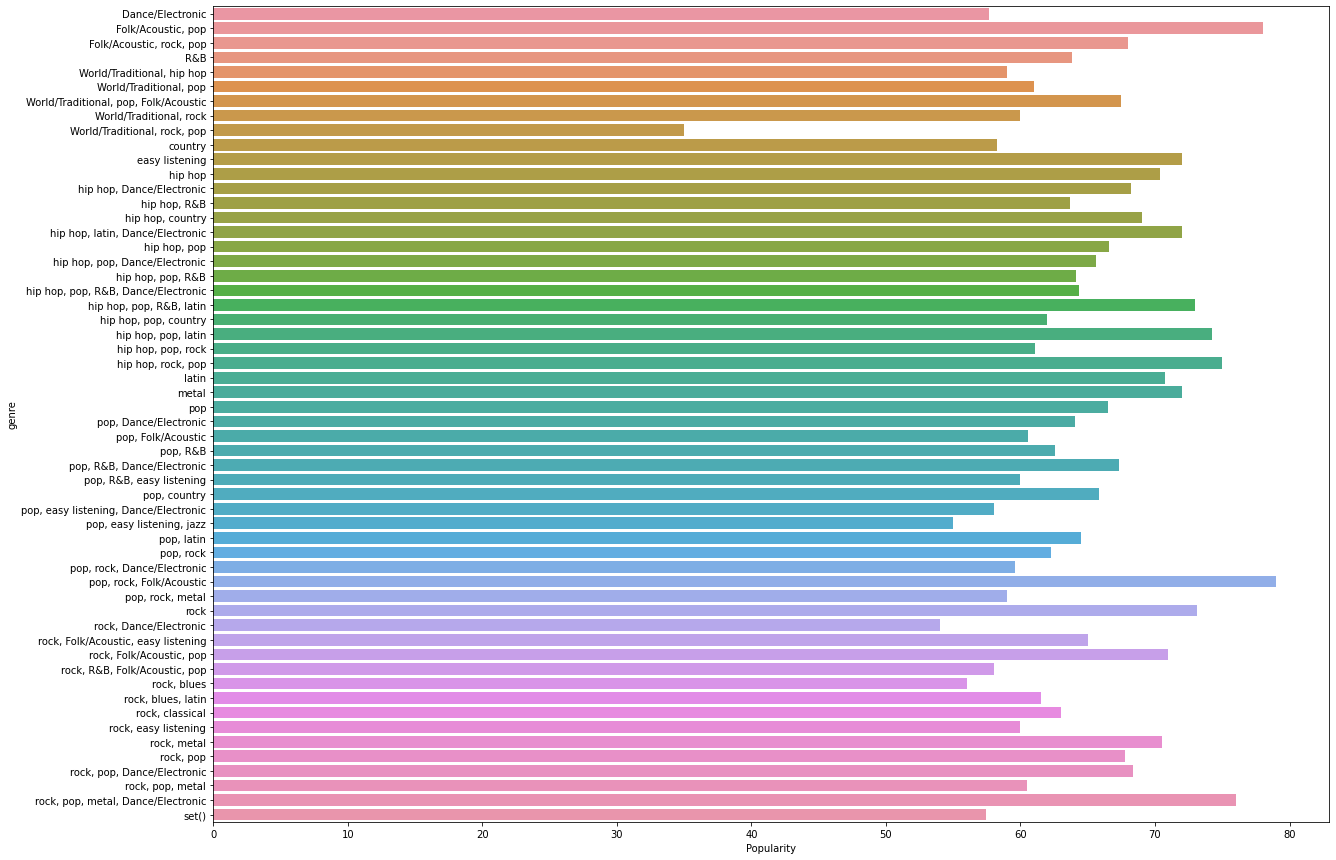

In [294]:
plt.figure(figsize=(20, 15))
genero = songs.groupby('genre')['popularity'].mean().reset_index()
sns.barplot(genero['popularity'], genero.genre, ci = None)
plt.xlabel('Popularity')

* Podemos observar que los 4 géneros que mayor promedio de popularidad tienen en el dataset tienen apenas dos o una canción en el mismo: 'Folk/Acoustic,pop', 'hip hop, rock, pop' , 'pop, rock, folk/acoustic', 'rock, pop, metal, dance/electronic'. A su vez hay dos géneros que su promedio de popularidad es '0': 'folk/acoustic, rock' y 'country,latin' que también cuentan con una sola canción en el dataset

* Trabajamos sobre la variable género para reducir sus valores únicos, nos quedaremos con el primer string en aquellos que son compuestos

In [295]:
songs['first_genre'] = songs['genre'].str.split(',').apply(lambda x: x[0].lower())

* Generamos un gráfico para ver la frecuencia de nuestra nueva columna

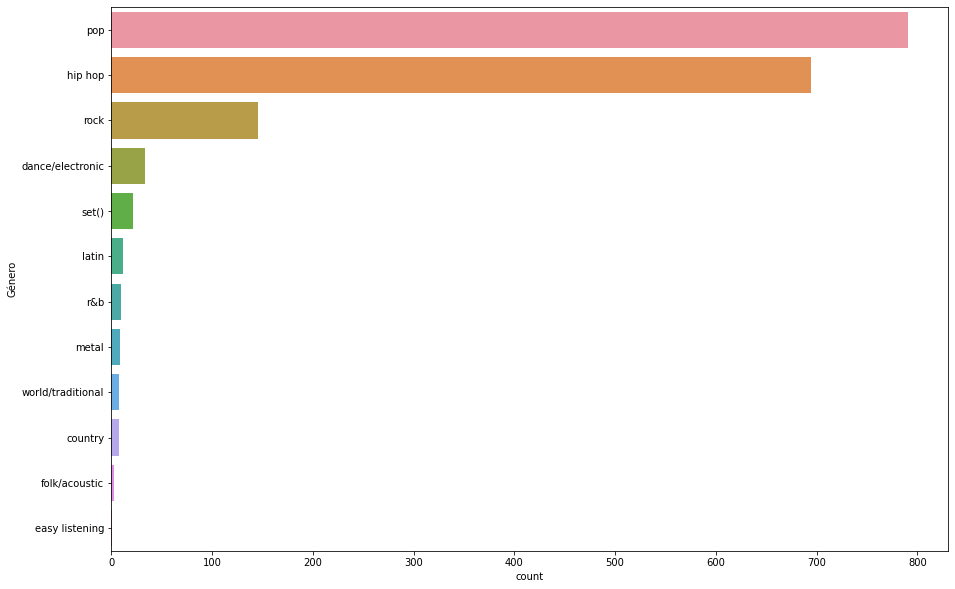

In [156]:
plt.figure(figsize=(15,10))

sns.countplot(y='first_genre', data=songs, order= songs['first_genre'].value_counts().index)
plt.ylabel("Género")

plt.show();

* Eliminamos los dos géneros que menos cantidad de canciones tienen en el dataset

In [296]:
songs = songs.drop(songs.index[songs['first_genre']=='easy listening'])
songs = songs.drop(songs.index[songs['first_genre']=='folk/acoustic'])

* Realizamos un barplot para ver la cantidad de canciones por año que tiene nuestro dataset

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]), <a list of 23 Text major ticklabel objects>)

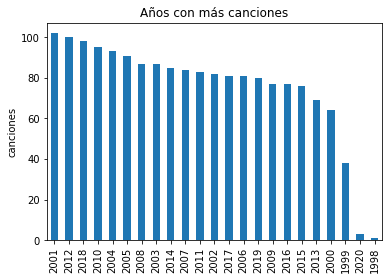

In [297]:
songs['year'].value_counts().plot(kind='bar')
plt.title('Años con más canciones')
plt.ylabel('canciones')
plt.xticks(rotation = 90)

* Vemos que la cantidad de canciones para 1998 y 2020 son muy pocas, el resto de los años superan las 70 canciones exceptuando 1999. Hay que evaluar las canciones en los dos años con cantidades marginales para ver si conservarlos en el modelo

* Vemos ahora la popularidad promedio a lo largo de los años

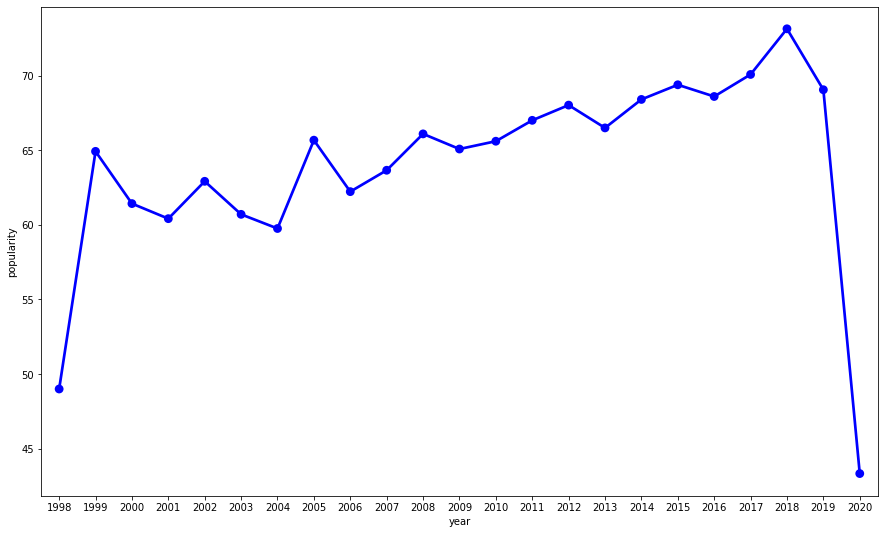

In [298]:
agrup_años = songs.groupby('year')['popularity'].mean().reset_index()
plt.figure(figsize=(15, 9))

ax = sns.pointplot(x = 'year', y = 'popularity', data=agrup_años, color = 'blue', label='tip')

* Observamos que la popularidad a lo largo de los años oscila entre los 55 y 65 puntos, exceptuando los dos años con pocos datos mencionados anteriormente (1998 y 2020) y el año 2018 que promedia por encima de los 70 puntos.

* Eliminamos los años 1998 y 2020 ya que sus muestras son muy inferiores al resto de los años. Nuestro dataset se reduce en 4 valores

In [299]:
songs = songs.drop(songs.index[songs['year']<1999])
songs = songs.drop(songs.index[songs['year']>2019])
songs.shape

(1730, 21)

* Genereamos un barplot para ver cómo es la proporción de canciones por nota que hay en el dataset

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

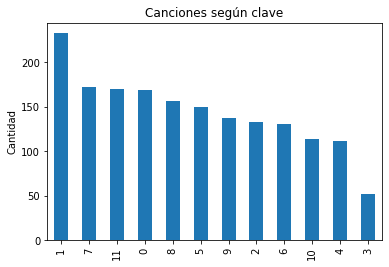

In [300]:
songs['key'].value_counts().plot(kind='bar')
plt.title('Canciones según clave')
plt.ylabel('Cantidad')
plt.xticks(rotation = 90)

* Vemos que la mayoría de las canciones están en Do#, seguidas por Si, Do y Sol. La que menos canciones tiene es re#. Vamos a complementar este análisis con la tonalidad (mayor o menor) que se encuentra en la variable 'mode'

* Genereamos un barplot para ver cómo es la proporción de canciones por modalidad o tono que hay en el dataset

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

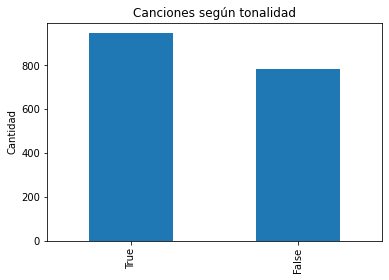

In [301]:
songs['mode'].value_counts().plot(kind='bar')
plt.title('Canciones según tonalidad')
plt.ylabel('Cantidad')
plt.xticks(rotation = 90)

* Vemos que la distribución está bastante proporcional, con mayoría de canciones en tonalidad mayor

* Comparamos la popularidad de las canciones por clave, según su tono (mayor o menor)

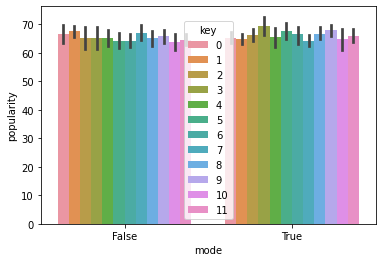

In [302]:
sns.barplot(x = 'mode', y = 'popularity', hue = 'key', data = songs)

* Se observa a simple vista que en promedio la popularidad es pareja según el tono

* Algunas notas cambian bastante su popularidad según su tono, por ejemplo para do# (key=1) es mayor la popularidad en menor que en mayor. Caso contrario ocurre con re# que tiene mayor popularidad en mayor.

* Observamos cómo se compone la variable explicit en el dataset

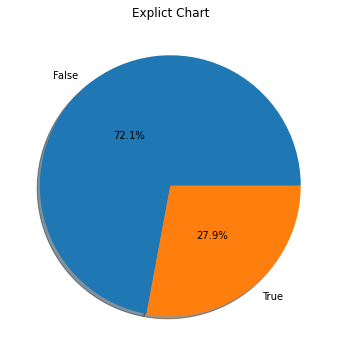

In [303]:
explicit_percentage = songs['explicit'].value_counts()
ax = plt.subplots(figsize=[10,6])
ax = plt.pie(x=explicit_percentage, autopct="%.1f%%", labels=songs['explicit'].value_counts().keys(), pctdistance=0.5,shadow=True )
ax = plt.title('Explict Chart')

* Son más las canciones sin contenido explícito, sin embargo el desbalanceo no es grande

* Realizamos el boxplot para energy y vemos que tiene dos outliers

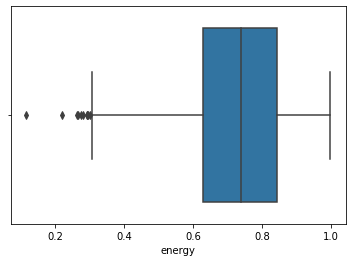

In [304]:
sns.boxplot(x=songs['energy'])

* Eliminamos los outliers, reduciendo nuestro conjunto en 3 registros

In [305]:
songs = songs.drop(songs.index[songs['energy']<0.2])
songs.shape

(1729, 21)

* Eliminamos los outliers, nuestro conjunto se reduce 4 registros

* Realizamos el boxplot para acousticness

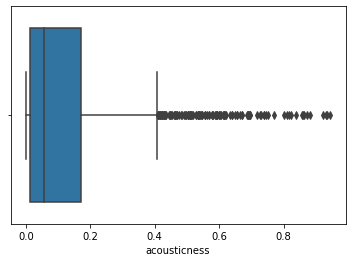

In [306]:
sns.boxplot(x=songs['acousticness'])

* Eliminamos los outliers que son los valores superiores a 0.8. Nuestro  conjunto se reduce en 14 registros

In [307]:
songs = songs.drop(songs.index[songs['acousticness']>0.8])
songs.shape 

(1715, 21)

* Realizamos el boxplot para speechiness

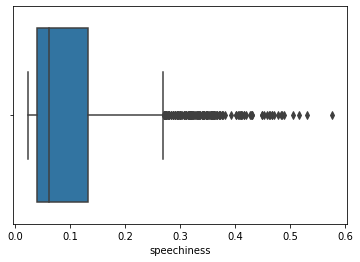

In [72]:
sns.boxplot(x=songs['speechiness'])

* Eliminamos los outliers que son los valores superiores a 0.45. Nuestro conjunto se reduce 15 registros

In [308]:
songs = songs.drop(songs.index[songs['speechiness']>0.45])
songs.shape 

(1700, 21)

* Usamos el metodo de correlacion spearman para chequear la correlación entre variables

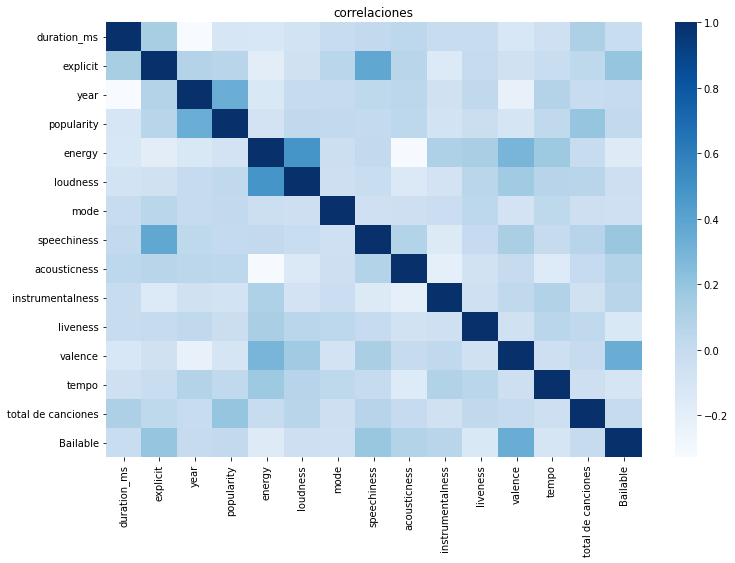

In [309]:
met_corr_spearman = songs.corr('spearman')


plt.figure(figsize=(12,8))
sns.heatmap(met_corr_spearman, cmap="Blues")
plt.title('correlaciones');

* Vemos que nuestra variable target solo presenta una correlación alta con la variable año que sin embargo no la consideramos como una numérica

* Se observan también correlaciones altas entre las siguientes variables:

  * `Explicit y speechiness`
  * `Energy y loudness`
  * `Energy y valence`


* Graficamos algunas de estas relaciones 

[Text(0.5, 1.0, 'Correlación Loudness VS Energy')]

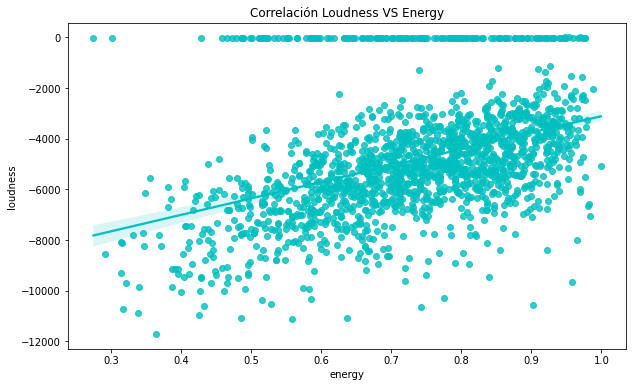

In [310]:
plt.figure(figsize=(10,6))
sns.regplot(data = songs, y = "loudness", x = "energy", color = "c").set(title= "Correlación Loudness VS Energy")

[Text(0.5, 1.0, 'Correlación Energy VS Valence')]

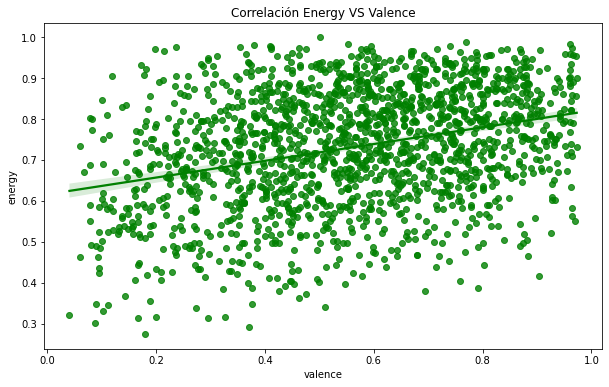

In [102]:
plt.figure(figsize=(10,6))
sns.regplot(data = songs, y = "energy", x = "valence", color = "g").set(title= "Correlación Energy VS Valence")

In [316]:
#Popularidad sasada en contenido explicito
px.box(songs,x='explicit',y='popularity',color='explicit',template='plotly_dark',color_discrete_sequence=['blue','pink'],title='<b>popularity based on explicit content')


#**----------------------------------------------------------------------------------------------------**

## **Primer modelo propuesto: Regresión lineal**

* Creamos nuestra variable target 'y' (popularity) y nuestra variable 'x'

In [317]:
x = songs.drop("popularity", axis=1)
y = songs["popularity"]

* Spliteamos el conjunto de datos para trabajar con un train y un test

In [318]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


* Eliminamos las variables categóricas que decidimos no tener en cuenta

In [319]:
X_train.drop(['artist', 'song', 'genre', 'total de canciones'],axis=1, inplace=True)

* Creamos la variable cat_col para seleccionar las columnas categóricas y realizarles one hot encoding

In [320]:
cat_col = X_train.select_dtypes(include='O').columns.tolist()

* Generamos un pipeline para transformaciones numericas 

In [321]:
numeric_transformer = Pipeline(
    steps=[("scaler", MinMaxScaler())])

* Generamos un pipeline para transformaciones categoricas

In [322]:
categorical_transformer = Pipeline(steps=[("ohe",OneHotEncoder(drop='first', handle_unknown="ignore"))])

* Realizamos una funcion que ejecute cada pipeline y luego los una

In [323]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, make_column_selector(dtype_exclude=object)),
        ("cat", categorical_transformer, make_column_selector(dtype_include = object)),
    ]
)
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', MinMaxScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f86ddcf8910>),
                                ('cat',
                                 Pipeline(steps=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f86ddcf8950>)])

* Creamos una lista para guardar el resultado de la función para nuestro X_train

In [324]:
X_array_enc = preprocessor.transform(X_train)

* Creamos el nombre de las columnas para armar un dataset con nuestra transformación

In [325]:
columns_enc = np.append(X_train.select_dtypes(exclude='object').columns, preprocessor.named_transformers_['cat']['ohe'].get_feature_names_out(cat_col))
columns_enc

array(['duration_ms', 'explicit', 'year', 'energy', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'Bailable', 'key_1', 'key_2', 'key_3', 'key_4',
       'key_5', 'key_6', 'key_7', 'key_8', 'key_9', 'key_10', 'key_11',
       'rango canciones_10+', 'rango canciones_5-9',
       'first_genre_dance/electronic', 'first_genre_hip hop',
       'first_genre_latin', 'first_genre_metal', 'first_genre_pop',
       'first_genre_r&b', 'first_genre_rock', 'first_genre_set()',
       'first_genre_world/traditional'], dtype=object)

* Creamos un dataset con el nuevo conjunto encodeado

In [326]:
columns_enc = np.append(X_train.select_dtypes(exclude='object').columns, preprocessor.named_transformers_['cat']['ohe'].get_feature_names_out(cat_col))
X_train_enc = pd.DataFrame(X_array_enc, columns = columns_enc, index = X_train.index)
X_train_enc

,duration_ms,explicit,year,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,rango canciones_5-9,first_genre_dance/electronic,first_genre_hip hop,first_genre_latin,first_genre_metal,first_genre_pop,first_genre_r&b,first_genre_rock,first_genre_set(),first_genre_world/traditional
1420,0.440778,0.0,0.75,0.667127,0.573735,1.0,0.034993,0.054851,0.000000,0.343582,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1365,0.290908,0.0,0.65,0.703039,0.685323,1.0,0.092767,0.137818,0.000110,0.786481,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1218,0.393571,0.0,0.65,0.780387,0.731512,0.0,0.065054,0.145621,0.000000,0.112982,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
673,0.397213,0.0,0.25,0.795580,0.587566,1.0,0.130108,0.005201,0.000755,0.283797,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
480,0.509878,0.0,0.45,0.472376,0.392565,0.0,0.012917,0.124034,0.000003,0.104441,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1167,0.548920,0.0,0.50,0.645028,0.518240,1.0,0.018553,0.113630,0.151269,0.114202,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1334,0.528217,1.0,0.65,0.893646,0.999687,1.0,0.141146,0.004395,0.000000,0.091752,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
895,0.407188,1.0,0.45,0.542818,0.653307,1.0,0.011743,0.032874,0.000000,0.879209,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1505,0.288279,0.0,0.95,0.401934,0.405883,0.0,0.018553,0.873859,0.000200,0.056613,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


* Realizamos los mismos pasos para el conjunto test

In [327]:
X_test.drop(['artist', 'song', 'genre', 'total de canciones'],axis=1, inplace=True)

X_array_enc_test = preprocessor.transform(X_test)


columns_enc = np.append(X_test.select_dtypes(exclude='object').columns, preprocessor.named_transformers_['cat']['ohe'].get_feature_names_out(cat_col))
X_test_enc = pd.DataFrame(X_array_enc_test, columns = columns_enc, index = X_test.index)
X_test_enc

,duration_ms,explicit,year,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,rango canciones_5-9,first_genre_dance/electronic,first_genre_hip hop,first_genre_latin,first_genre_metal,first_genre_pop,first_genre_r&b,first_genre_rock,first_genre_set(),first_genre_world/traditional
1539,0.336153,1.0,0.80,0.111878,0.525668,0.0,0.403476,0.289968,0.000000,0.088946,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
120,0.502993,1.0,0.10,0.785912,0.654160,0.0,0.748708,0.023121,0.000128,0.048804,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
140,0.513871,0.0,0.75,0.714088,0.699581,1.0,0.192109,0.060703,0.000004,0.020132,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
362,0.467681,0.0,0.05,0.730663,0.554525,1.0,0.009159,0.019220,0.000044,0.099561,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1342,0.453757,0.0,0.75,0.680939,0.492200,0.0,0.027008,0.005604,0.000000,0.110542,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,0.351811,0.0,0.60,0.837017,0.662698,1.0,0.081963,0.182033,0.000000,0.064788,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
899,0.367839,0.0,0.45,0.603591,0.735013,0.0,0.008690,0.001233,0.000000,0.466813,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1212,0.273252,0.0,0.65,0.962707,0.866067,0.0,0.046736,0.008504,0.000589,0.244754,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1640,0.510012,1.0,0.90,0.569061,0.680371,0.0,0.455143,0.314676,0.000000,0.164226,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


* Creamos nuestro modelo de regresión lineal y lo entrenamos con nuestro conjunto train

In [328]:
lr = LinearRegression()
lr.fit(X_train_enc, y_train)

LinearRegression()

* Predecimos la popularidad para nuestro conjunto test y las guardamos en 'y_pred'

In [329]:
y_pred_lr = lr.predict(X_test_enc)

* Conusltamos las métricas de nuestro modelo para el conjunto test.

In [337]:
metrics_dict = {'MAE': [mean_absolute_error(y_test, y_pred_lr)], 'MSE': [mean_squared_error(y_test, y_pred_lr)],
              'R2': [r2_score(y_test, y_pred_lr)], 'MAPE': [mean_absolute_percentage_error(y_test, y_pred_lr)]}
              
pd.DataFrame.from_dict(metrics_dict, orient='index')

,0
MAE,7.650406
MSE,98.283809
R2,0.150613
MAPE,0.133557


* Vemos ahora la perdormance de nuestro conjunto train

In [336]:
y_pred_train = lr.predict(X_train_enc)

In [338]:
metrics_dict = {'MAE': [mean_absolute_error(y_train, y_pred_train)], 'MSE': [mean_squared_error(y_train, y_pred_train)],
              'R2': [r2_score(y_train, y_pred_train)], 'MAPE': [mean_absolute_percentage_error(y_train, y_pred_train)]}
              
pd.DataFrame.from_dict(metrics_dict, orient='index')

,0
MAE,7.338412
MSE,93.893554
R2,0.193829
MAPE,0.129879


`Training error = 81%`

`Validation error = 86%`


* Nuestro resultado usando regresión lineal no es bueno. El bias del modelo es muy alto (80%) y su varianza no tanto (5%). Probaremos entonces cambiando de modelo


## **Segundo modelo propuesto: Random forest para regresión**

* Creamos nuestro modelo y lo entrenamos con el conjunto train

In [339]:
rfr = RandomForestRegressor(n_estimators=100, random_state=1)


rfr.fit(X_train_enc, y_train)

RandomForestRegressor(random_state=1)

* Creamos la predicción usando nuestro conjunto test

In [342]:
y_pred_rfr = rfr.predict(X_test_enc)

* Comparamos en nuestro conjunto el resulto predecido y el resultado verdadero

In [343]:
X_test['pred'] = y_pred_rfr
X_test['target'] = y_test
X_test.head(20)

,duration_ms,explicit,year,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,rango canciones,Bailable,first_genre,pred,target
1539,198293,True,2015,0.356,11,-5556.00,False,0.1950,0.223000,0.000000,0.0963,0.189,96.991,0-4,1,hip hop,70.130000,78
120,240626,True,2001,0.844,1,-4051.00,False,0.3420,0.017800,0.000126,0.0634,0.697,84.411,10+,0,hip hop,65.806500,63
140,243386,False,2014,0.792,7,-3519.00,True,0.1050,0.046700,0.000004,0.0399,0.960,90.949,5-9,1,pop,71.374000,66
362,231666,False,2000,0.804,2,-5218.00,True,0.0271,0.014800,0.000043,0.1050,0.789,79.166,0-4,0,rock,64.010000,68
1342,228133,False,2014,0.768,10,-5948.00,False,0.0347,0.004330,0.000000,0.1140,0.545,77.217,5-9,0,pop,64.726667,79
1373,258342,False,2012,0.922,2,-4457.00,True,0.0786,0.029100,0.000000,0.0862,0.847,146.078,0-4,0,hip hop,64.340000,81
1436,212500,True,2019,0.801,8,-4167.00,False,0.2280,0.157000,0.000005,0.0642,0.617,95.881,5-9,1,hip hop,69.440000,70
340,269400,True,2001,0.568,1,-4958.00,True,0.0459,0.047800,0.000036,0.0304,0.806,100.005,10+,1,hip hop,66.915000,59
1265,217666,True,2011,0.834,2,-4524.00,False,0.0675,0.064600,0.000000,0.2710,0.538,164.020,0-4,0,hip hop,62.930000,75
324,340920,True,2001,0.694,10,-8627.00,False,0.1710,0.025300,0.000000,0.0698,0.525,167.953,0-4,0,hip hop,59.940000,74


* Consultamos la métrica R2 para nuestro modelo

In [344]:
r2_score(y_test,y_pred_rfr)

0.12106719275294842

* Consultamos el error de nuestro modelo

In [ ]:
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = y_pred_rfr,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 9.920396280669957


* Vemos la importancia que tiene cada feature en el modelo creado

In [345]:
# verificar características importantes
feature_importances_df = pd.DataFrame(
    {"feature": list(X_train_enc.columns), "importance": rfr.feature_importances_}
).sort_values("importance", ascending=False)

# Mostrar
feature_importances_df

,feature,importance
2,year,0.132213
3,energy,0.098235
0,duration_ms,0.087484
6,speechiness,0.084774
11,tempo,0.080739
7,acousticness,0.076621
9,liveness,0.075056
4,loudness,0.071475
10,valence,0.065706
8,instrumentalness,0.048318


* Vemos ahora la performance de nuestro modelo con el conjunto train

In [346]:
y_pred = rfr.predict(X_train_enc)

In [347]:
r2_score(y_train,y_pred)

0.8741334773143523

In [348]:
rmse = mean_squared_error(
        y_true  = y_train,
        y_pred  = y_pred,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 3.828770893341325


`Training error = 12%`

`Validation error = 87%`

* Con este modelo nuestro resultados arrojan una varianza muy alta (75%) y un bias alto (12%), aunque aceptable para la dificutlad que implica acertar la popularidad exacta

* Trataremos de mejorar el modelo para prevenir el overfitting. Chequeamos antes la performance de nuestro conjunto train con CV para ver si el overfitting está concentrado

In [349]:
scores = cross_val_score(rfr, X_train_enc, y_train, scoring="neg_mean_absolute_error")
scores*-1

array([7.46371936, 8.14893321, 8.32787929, 7.63023346, 7.73515371])

In [350]:
print("Cross validation score es  %.5f ± %0.2f" % (scores.mean()*-1, scores.std()))

Cross validation score es  7.86118 ± 0.32


* El error se mantiene parejo en todo el conjunto. Vamos a intentar mejorar el modelo utilizando el método bayesiano

In [351]:
!pip install git+https://github.com/scikit-optimize/scikit-optimize.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/scikit-optimize/scikit-optimize.git to /tmp/pip-req-build-5bpaipyo
  Running command git clone -q https://github.com/scikit-optimize/scikit-optimize.git /tmp/pip-req-build-5bpaipyo
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Using cached pyaml-21.10.1-py2.py3-none-any.whl (24 kB)
  Created wheel for scikit-optimize: filename=scikit_optimize-0.9.0-py2.py3-none-any.whl size=100268 sha256=aa8b7146e68ebcbe9adebbdd8e1ec0d063f5d2efb071ef93dace6a9fda37e723
  Stored in directory: /tmp/pip-ephem-wheel-cache-rrlj4z4w/wheels/d6/9e/e3/8818f5597f06caa60393811f8aa57eb87b8565d772046d1b72
Successfully built scikit-optimize


* Importamos BayesSearch

In [352]:
from skopt import BayesSearchCV
semilla = 42
seed_search_cv = 123
cv = 3
n_iter = 30

In [353]:
param_grid = {
    "max_features": [8, 11, 14, 16],
    "n_estimators": (100,  800) , 
    "max_depth": (4, 400)
    }

reg_bay = BayesSearchCV(RandomForestRegressor(random_state=42),
                    search_spaces=param_grid,
                    cv=3,
                    n_jobs=-1,
                    n_iter = n_iter,
                    scoring='neg_mean_absolute_error',
                    random_state=123)

start_time = time.time()

model_bay = reg_bay.fit(X_train_enc, y_train)

end_time = time.time()

In [354]:
max(pd.DataFrame(model_bay.cv_results_)['mean_test_score'])*-1

7.7808406826198535

In [355]:
mean_absolute_error(y_test, model_bay.predict(X_test_enc))

7.4891852691630785

* Vemos cuáles son los mejores parámetros tras realizar bayes

In [356]:
model_bay.best_params_

OrderedDict([('max_depth', 344), ('max_features', 8), ('n_estimators', 391)])

* Corremos el modelo con los parámetros obtenidos

In [357]:
rfr = RandomForestRegressor(n_estimators=800, max_depth=400, max_features=8)


rfr.fit(X_train_enc, y_train)

RandomForestRegressor(max_depth=400, max_features=8, n_estimators=800)

* Vemos la performance con el conjunto train

In [358]:
y_pred_rfr = rfr.predict(X_train_enc)

In [ ]:
r2_score(y_train,y_pred_rfr)

0.8882353147198868

* Vemos la performance con el conjunto test

In [359]:
y_pred_rfr = rfr.predict(X_test_enc)

In [ ]:
r2_score(y_test,y_pred_rfr)

0.17373761441774072

In [360]:
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = y_pred_rfr,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 9.848929634240067


`Training error = 12%`

`Validation error = 83%`

* Vemos que el r2 y el error mejoran pero muy poco tras buscar hiperparámetros con bayes. El bias permanece igual, y la varianza baja ya que mejora la performance del conjunto train

* Vamos a intentar obtener mejores resultados usando modelos de boosting. Buscaremos cual es el que mejor se ajusta a nuestro problema. Para eso definimos los paráemtros globales,y los específicos de los tres modelos con los que vamos a iterar: GradientBoostingRegressor, XGBRegressor y LGBMRegressor

In [361]:
# parametros globales
num_estimators = np.linspace(100, 700, num = 20, endpoint = True).astype(int)
max_depth = random.sample(range(1, 30), 20)
learning_rate = np.arange (0.001, 1, 0.005)

#gradiante y adaboost
max_features = np.arange(start = 1, stop = X_train.shape[1]+1, step = 1)

#xgboost
booster = ['gbtree']

params_global = {'n_estimators': num_estimators,
                 'max_depth': max_depth, 
                 'learning_rate': learning_rate}

* Seleccionamos el mejor algoritmo

In [362]:
results = {}


for model in [GradientBoostingRegressor(), XGBRegressor(), LGBMRegressor()]:
  print(f'Start training {model.__class__.__name__}')

 
  modeling = RandomizedSearchCV(model, params_global, cv=5, n_jobs=-1, refit=True, scoring='neg_mean_absolute_error', verbose=1, n_iter=30, random_state=1)

  
  modeling.fit(X_train_enc, y_train)

  
  best_model = modeling.best_estimator_

 
  metrics_test = mean_absolute_error(y_test, best_model.predict(X_test_enc))

  
  results[best_model.__class__.__name__] = {'modelo': best_model,
                                            'score_train': modeling.best_score_,
                                            'score_test': metrics_test,
                                            'params': modeling.best_params_}
  

Start training GradientBoostingRegressor
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Start training XGBRegressor
Fitting 5 folds for each of 30 candidates, totalling 150 fits
[23:45:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Start training LGBMRegressor
Fitting 5 folds for each of 30 candidates, totalling 150 fits


* Consultamos los resultados en un dataframe

In [363]:
summary = pd.DataFrame.from_dict(results, orient='index')
summary

,modelo,score_train,score_test,params
GradientBoostingRegressor,([DecisionTreeRegressor(criterion='friedman_ms...,-7.850667,7.646545,"{'n_estimators': 100, 'max_depth': 1, 'learnin..."
XGBRegressor,"XGBRegressor(learning_rate=0.611, max_depth=1)",-7.810824,7.676108,"{'n_estimators': 100, 'max_depth': 1, 'learnin..."
LGBMRegressor,"LGBMRegressor(learning_rate=0.611, max_depth=1)",-7.778582,7.638702,"{'n_estimators': 100, 'max_depth': 1, 'learnin..."


* Vemos que el error más chico lo tenemos con el XGBRegressorr, por lo que consultamos los parámetros óptimos

In [364]:
summary.loc['XGBRegressor']['params']

{'n_estimators': 100, 'max_depth': 1, 'learning_rate': 0.611}

In [365]:
xgb = XGBRegressor(n_estimators = 289, max_depth = 5, learning_rate = 0.046)

xgb.fit(X_train_enc, y_train)


[23:46:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.046, max_depth=5, n_estimators=289)

In [366]:
y_pred_xgb = xgb.predict(X_test_enc)

r2_score(y_test, y_pred_xgb)

0.12011203063579035

In [367]:
y_pred_train = xgb.predict(X_train_enc)

r2_score(y_train, y_pred_train)

0.7504150224532734

`Training error = 19%`

`Validation error = 88%`

* El mejor boosting conseguido tiene peor performance con el conjunto test y con el train. Por lo que el bias es mayor, y se reduce un poco la varianza.

* Vemos ahora en conjunto nuestras performance intentando predecir la popularidad exacta

In [368]:
print("R^2 score for LR",r2_score(y_test, y_pred_lr))
print("R^2 score for RF",r2_score(y_test, y_pred_rfr))
print("R^2 score for XG",r2_score(y_test, y_pred_xgb))

R^2 score for LR 0.15061295464617586
R^2 score for RF 0.16169564736644104
R^2 score for XG 0.12011203063579035


* Tras no conseguir buenos resultados usando regresión, vamos a ver si podemos predecir si una canción va a superar los 75 puntos de popularidad. Transformamos entonces el problema en una clasificación. El primer modelo de clasificación que usaremos será regresión logística

## **Tercer modelo propuesto: Regresión logística**

* Creamos una función para armar el target para nuestro modelo. Vamos a intentar predecir si una canción alcanza o supera el índice de 75 puntos de popularidad

In [ ]:
def clasificar(x):
  if x >= 75:
    return 1
  else:
    return 0

In [ ]:
songs['target'] = songs['popularity'].apply(clasificar)

In [ ]:
songs.head()

,artist,song,duration_ms,explicit,year,popularity,energy,key,loudness,mode,...,instrumentalness,liveness,valence,tempo,genre,total de canciones,rango canciones,Bailable,first_genre,target
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.834,1,-5444.00,False,...,0.000018,0.3550,0.894,95.053,pop,18,10+,1,pop,1
1,Britney Spears,Born to Make You Happy,243533,False,1999,58,0.922,11,-4842.00,False,...,0.000465,0.0710,0.686,84.110,pop,18,10+,0,pop,0
2,Britney Spears,Lucky,206226,False,2000,65,0.791,8,-5707.00,True,...,0.000154,0.0669,0.966,95.026,pop,18,10+,1,pop,0
3,Britney Spears,I'm a Slave 4 U,203600,False,2001,69,0.843,5,-3579.00,False,...,0.000134,0.1070,0.963,110.027,pop,18,10+,1,pop,0
4,Britney Spears,Overprotected - Radio Edit,198600,False,2001,61,0.894,0,-1.73,False,...,0.000000,0.4160,0.845,95.992,pop,18,10+,0,pop,0


* Consultamos la proporción de los valores posibles de nuestro target en el conjunto

In [ ]:
songs.target.value_counts(normalize=True)

0    0.776892
1    0.223108
Name: target, dtype: float64

* Creamos nuestras variables x e y, y luego spliteamos el conjunto para tener un train y un test

In [ ]:
y = songs['target']
X = songs.drop('target', axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=50, stratify=y)

* Eliminamos las columnas que no vamos a tener en cuenta para nuestro modelo

In [ ]:
X_train.drop(['artist', 'song', 'genre', 'popularity', 'total de canciones'],axis=1, inplace=True)

* Creamos una variable para agrupar nuestras columnas categóricas

In [ ]:
cat_col = X_train.select_dtypes(include='O').columns.tolist()

* Usamos la función creada en nuestro primer modelo para realizar las transformaciones

In [ ]:
X_array_enc = preprocessor.transform(X_train)

* Creamos las columnas que vamos a unir con nuestra lista transformada para obtener el nuevo conjunto

In [ ]:
columns_enc = np.append(X_train.select_dtypes(exclude='object').columns, preprocessor.named_transformers_['cat']['ohe'].get_feature_names_out(cat_col))
columns_enc

array(['duration_ms', 'explicit', 'year', 'energy', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'Bailable', 'key_1', 'key_2', 'key_3', 'key_4',
       'key_5', 'key_6', 'key_7', 'key_8', 'key_9', 'key_10', 'key_11',
       'rango canciones_10+', 'rango canciones_5-9',
       'first_genre_dance/electronic', 'first_genre_hip hop',
       'first_genre_latin', 'first_genre_metal', 'first_genre_pop',
       'first_genre_r&b', 'first_genre_rock', 'first_genre_set()',
       'first_genre_world/traditional'], dtype=object)

* Creamos el conjunto encodeado

In [ ]:
X_train_enc = pd.DataFrame(X_array_enc, columns = columns_enc, index = X_train.index)
X_train_enc

,duration_ms,explicit,year,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,rango canciones_5-9,first_genre_dance/electronic,first_genre_hip hop,first_genre_latin,first_genre_metal,first_genre_pop,first_genre_r&b,first_genre_rock,first_genre_set(),first_genre_world/traditional
772,0.415397,0.0,0.45,0.465470,0.626864,1.0,0.019962,0.087718,0.000000,0.306663,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
881,0.347661,1.0,0.50,0.809392,0.403936,1.0,0.039925,0.059488,0.010041,0.239170,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1729,0.261708,1.0,0.95,0.154696,0.220794,1.0,0.913105,0.117146,0.000000,0.137317,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1028,0.626430,1.0,0.55,0.781768,0.628828,0.0,0.781588,0.057890,0.000000,0.679715,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1631,0.500526,1.0,0.85,0.560773,0.550363,0.0,0.786285,0.209027,0.000000,0.202356,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1536,0.615553,0.0,0.85,0.751381,0.492390,0.0,0.222640,0.569892,0.000000,0.053749,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
830,0.317866,0.0,0.30,0.939227,0.636939,1.0,0.046970,0.000422,0.000001,0.642901,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1193,0.366842,0.0,0.60,0.736188,0.585028,0.0,0.098638,0.026597,0.000000,0.134863,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
302,0.419023,0.0,0.30,0.745856,0.651027,1.0,0.010333,0.000938,0.000000,0.478464,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


* Realizamos los mismos pasos para el conjunto test

In [ ]:
X_test.drop(['artist', 'song', 'genre', 'popularity', 'total de canciones'],axis=1, inplace=True)

X_array_enc_test = preprocessor.transform(X_test)


columns_enc = np.append(X_test.select_dtypes(exclude='object').columns, preprocessor.named_transformers_['cat']['ohe'].get_feature_names_out(cat_col))
X_test_enc = pd.DataFrame(X_array_enc_test, columns = columns_enc, index = X_test.index)
X_test_enc

,duration_ms,explicit,year,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,rango canciones_5-9,first_genre_dance/electronic,first_genre_hip hop,first_genre_latin,first_genre_metal,first_genre_pop,first_genre_r&b,first_genre_rock,first_genre_set(),first_genre_world/traditional
1531,0.250503,0.0,0.80,0.737569,0.737005,0.0,0.092297,0.004572,0.001249,0.663762,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1338,0.413872,0.0,0.60,0.912983,0.501867,1.0,0.048614,0.011244,0.000000,0.167996,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
239,0.456015,0.0,0.15,0.708564,0.550705,0.0,0.040160,0.039647,0.000000,0.838017,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
118,0.493692,0.0,0.10,0.689227,0.482144,0.0,0.046031,0.038315,0.051777,0.035833,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
39,0.724699,1.0,0.25,0.680939,0.702170,0.0,0.788633,0.025665,0.000345,0.098049,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,0.321649,1.0,0.80,0.218232,0.095199,1.0,0.379991,0.142447,0.000000,0.136090,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
165,0.336361,0.0,0.05,0.772099,0.763303,1.0,0.325975,0.045639,0.000000,0.079151,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1233,0.474822,0.0,0.65,0.584254,0.644453,1.0,0.046736,0.065213,0.000000,0.349613,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
252,0.704603,1.0,0.05,0.587017,0.999509,1.0,0.057774,0.081992,0.000002,0.269849,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


* Creamos el regresor y entrenamos el modelo usando el conjunto de entrenamiento

In [ ]:
lrgs = LogisticRegression(C=1, n_jobs=-1, random_state=34, class_weight='balanced')
lrgs.fit(X_train_enc, y_train)

LogisticRegression(C=1, class_weight='balanced', n_jobs=-1, random_state=34)

* Vemos las predicciones de nuestro modelo para el conjunto train

In [ ]:
predictions = lrgs.predict(X_train_enc)

* Observamos ahora la matriz de confusión y el reporte de clasificación para el conjunto train

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
confusion_matrix(y_train, predictions)

array([[739, 353],
       [ 87, 226]])

In [ ]:
print(classification_report(y_train, predictions))

              precision    recall  f1-score   support

           0       0.89      0.68      0.77      1092
           1       0.39      0.72      0.51       313

    accuracy                           0.69      1405
   macro avg       0.64      0.70      0.64      1405
weighted avg       0.78      0.69      0.71      1405



* Creamos las predicciones usando nuestro conjunto test

In [ ]:
y_pred_rl = lrgs.predict(X_test_enc)

* Consultamos la matriz de confusión y el reporte para el conjunto test

In [ ]:
confusion_matrix(y_test, y_pred_rl)

array([[172, 101],
       [ 32,  47]])

In [ ]:
print(classification_report(y_test, y_pred_rl))

              precision    recall  f1-score   support

           0       0.84      0.63      0.72       273
           1       0.32      0.59      0.41        79

    accuracy                           0.62       352
   macro avg       0.58      0.61      0.57       352
weighted avg       0.73      0.62      0.65       352



`Training error = 31%`

`Validation error = 38%`

* Con Regresión Logística nuestro modelo mejoró su performance considerablemente. Nuestra varianza es prácticamente nula ya que la performance en nuestro conjunto train es igual que en nuestro test. Sin embargo el bias es alto (31%). Vamos a tratar de mejorar nuestro modelo dandole mayor peso a nuestro resultado menos repetido (canción con popularidad mayor a 75). Para encontrar el valor óptimo usaremos gridsearch

In [ ]:
lr = LogisticRegression(random_state=34)

* Seteamos los posibles valores de los pesos

In [ ]:
weights = np.linspace(0.0,0.99,200)

* Creamos un diccionario con los valores posibles

In [ ]:
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

In [ ]:
gridsearch = GridSearchCV(estimator= lr, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(), 
                          n_jobs=-1, 
                          scoring='f1', 
                          verbose=2).fit(X_train_enc, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


* Graficamos los diferentes resultados obtenidos con cada peso

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Resultados para diferentes pesos')

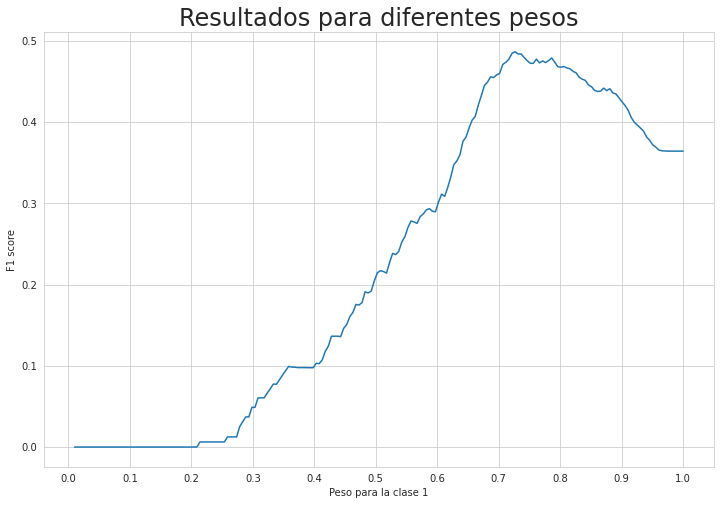

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
weigh_data = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'], 'weight': (1- weights)})
sns.lineplot(weigh_data['weight'], weigh_data['score'])
plt.xlabel('Peso para la clase 1')
plt.ylabel('F1 score')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('Resultados para diferentes pesos', fontsize=24)

* Nuestro peso óptimo para la clase 1 es de 0,73. Veremos la performance del modelo con los resultados obtenidos

In [ ]:
lr = LogisticRegression(class_weight={0: 0.27, 1: 0.73})
lr.fit(X_train_enc, y_train)

LogisticRegression(class_weight={0: 0.27, 1: 0.73})

In [ ]:
y_pred_rlCW = lr.predict(X_test_enc)

print(classification_report(y_test, y_pred_rlCW))

              precision    recall  f1-score   support

           0       0.83      0.73      0.77       273
           1       0.34      0.48      0.40        79

    accuracy                           0.67       352
   macro avg       0.58      0.60      0.58       352
weighted avg       0.72      0.67      0.69       352



In [ ]:
confusion_matrix(y_test, y_pred_rlCW)

array([[198,  75],
       [ 41,  38]])

In [ ]:
pred_test = lr.predict(X_train_enc)
print(classification_report(y_train, pred_test))

              precision    recall  f1-score   support

           0       0.87      0.77      0.82      1092
           1       0.43      0.61      0.50       313

    accuracy                           0.73      1405
   macro avg       0.65      0.69      0.66      1405
weighted avg       0.77      0.73      0.75      1405



In [ ]:
confusion_matrix(y_train, pred_test)

array([[836, 256],
       [121, 192]])

* Tras utilizar el resultado obtenido para el peso óptimo de cada posible resultado, vemos que tanto el conjunto train como el test mejoran su performance pero a expensas de bajar el recall de las canciones populares. Por esto vamos a buscar mejores parámetros para el primer modelo (class_weight=balanced)

In [ ]:
model = LogisticRegression(class_weight='balanced')

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-5, 100)

In [ ]:
search = RandomizedSearchCV(model, space, n_iter=10, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)

In [ ]:
result = search.fit(X_train_enc, y_train)
print('Mejor resultado: %s' % result.best_score_)
print('Mejores hiperparámetros: %s' % result.best_params_)

Mejor resultado: 0.6688382303275922
Mejores hiperparámetros: {'C': 0.008301451461243866, 'penalty': 'none', 'solver': 'newton-cg'}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
120 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solv

* Tras realizar randomsearch encontramos mejoras para nuestro modelo, corremos el algoritmo con los hiperparámetros encontrados

In [ ]:
lr = LogisticRegression(penalty= 'none', solver='newton-cg', C= 0.008301451461243866, class_weight='balanced')
lr.fit(X_train_enc, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


LogisticRegression(C=0.008301451461243866, class_weight='balanced',
                   penalty='none', solver='newton-cg')

In [ ]:
y_pred_rlRS = lr.predict(X_test_enc)

In [ ]:
confusion_matrix(y_test, y_pred_rlRS)

array([[173, 100],
       [ 33,  46]])

In [ ]:
print(classification_report(y_test, y_pred_rlRS))

              precision    recall  f1-score   support

           0       0.84      0.63      0.72       273
           1       0.32      0.58      0.41        79

    accuracy                           0.62       352
   macro avg       0.58      0.61      0.57       352
weighted avg       0.72      0.62      0.65       352



In [ ]:
predictions = lr.predict(X_train_enc)

In [ ]:
confusion_matrix(y_train, predictions)

array([[736, 356],
       [ 85, 228]])

In [ ]:
print(classification_report(y_train, predictions))

              precision    recall  f1-score   support

           0       0.90      0.67      0.77      1092
           1       0.39      0.73      0.51       313

    accuracy                           0.69      1405
   macro avg       0.64      0.70      0.64      1405
weighted avg       0.78      0.69      0.71      1405



* Tras realizar búsqueda de hiperparámetros mediante randomsearch, nuestro modelo no muestra una mejora. Intentaremos ahora utilizando otro modelo: random forest para clasificación

## **Cuarto modelo propuesto: Random forest clasificación**

* Creamos el clasificador y lo entrenamos con nuestro conjunto train

In [ ]:
rfc = RandomForestClassifier(class_weight='balanced', random_state=42)
rfc.fit(X_train_enc, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

* Realizamos las predicciones para el conjunto de entrenamiento

In [ ]:
predictions = rfc.predict(X_train_enc)

* Vemos los resultados del conjunto de entrenamiento

In [ ]:
confusion_matrix(y_train, predictions)

array([[1089,    3],
       [   0,  313]])

In [ ]:
print(classification_report(y_train, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1092
           1       0.99      1.00      1.00       313

    accuracy                           1.00      1405
   macro avg       1.00      1.00      1.00      1405
weighted avg       1.00      1.00      1.00      1405



* Realizamos las predicciones para nuestro conjunto test

In [ ]:
y_pred_rfc = rfc.predict(X_test_enc)

* Vemos los resultados del conjunto test

In [ ]:
confusion_matrix(y_test, y_pred_rfc)

array([[269,   4],
       [ 68,  11]])

In [ ]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.80      0.99      0.88       273
           1       0.73      0.14      0.23        79

    accuracy                           0.80       352
   macro avg       0.77      0.56      0.56       352
weighted avg       0.78      0.80      0.74       352



`Training error = 0%`

`Validation error = 20%`

* El modelo es muy bueno con el conjunto train, pero no con tanto con el test. Si bien el accuracy de nuestro test es alto, el recall es muy bajo. De un total de 79 canciones populares acertó 11. Tenemos ahora un caso de overfitting, ya que la varianza es alta y el bias es bajo. Intentaremos mejorar el modelo con la búsqueda de hiperparámetros

* Los modelos Random Forest tienen la ventaja de disponer del Out-of-Bag error, lo que permite obtener una estimación del error de test sin recurrir a la validación cruzada. Vamos a realizar búsqueda de hiperparámetros con out of bag accuracy

In [ ]:
from sklearn.model_selection import ParameterGrid

In [ ]:
# Grid de hiperparámetros evaluados
param_grid = ParameterGrid(
                {'n_estimators': [10,150, 300],
                 'max_features': [11, 13, 15,18],
                 'max_depth'   : [2, 8, 16,32],
                 'criterion'   : ['gini', 'entropy']
                }
            )

# Loop para ajustar un modelo con cada combinación de hiperparámetros
# ==============================================================================
resultados = {'params': [], 'oob_accuracy': []}

for params in param_grid:
    
    modelo = RandomForestClassifier(
                class_weight='balanced',
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123,
                ** params
             )
    
    modelo.fit(X_train_enc, y_train)
    
    resultados['params'].append(params)
    resultados['oob_accuracy'].append(modelo.oob_score_)
    print(f"Modelo: {params} \u2713")

# Resultados
# ==============================================================================
resultados = pd.DataFrame(resultados)
resultados = pd.concat([resultados, resultados['params'].apply(pd.Series)], axis=1)
resultados = resultados.sort_values('oob_accuracy', ascending=False)
resultados = resultados.drop(columns = 'params')
resultados.head(4)

Modelo: {'criterion': 'gini', 'max_depth': 2, 'max_features': 11, 'n_estimators': 10} ✓


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,


Modelo: {'criterion': 'gini', 'max_depth': 2, 'max_features': 11, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 2, 'max_features': 11, 'n_estimators': 300} ✓
Modelo: {'criterion': 'gini', 'max_depth': 2, 'max_features': 13, 'n_estimators': 10} ✓


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,


Modelo: {'criterion': 'gini', 'max_depth': 2, 'max_features': 13, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 2, 'max_features': 13, 'n_estimators': 300} ✓
Modelo: {'criterion': 'gini', 'max_depth': 2, 'max_features': 15, 'n_estimators': 10} ✓


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,


Modelo: {'criterion': 'gini', 'max_depth': 2, 'max_features': 15, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 2, 'max_features': 15, 'n_estimators': 300} ✓
Modelo: {'criterion': 'gini', 'max_depth': 2, 'max_features': 18, 'n_estimators': 10} ✓


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,


Modelo: {'criterion': 'gini', 'max_depth': 2, 'max_features': 18, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 2, 'max_features': 18, 'n_estimators': 300} ✓
Modelo: {'criterion': 'gini', 'max_depth': 8, 'max_features': 11, 'n_estimators': 10} ✓


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,


Modelo: {'criterion': 'gini', 'max_depth': 8, 'max_features': 11, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 8, 'max_features': 11, 'n_estimators': 300} ✓
Modelo: {'criterion': 'gini', 'max_depth': 8, 'max_features': 13, 'n_estimators': 10} ✓


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,


Modelo: {'criterion': 'gini', 'max_depth': 8, 'max_features': 13, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 8, 'max_features': 13, 'n_estimators': 300} ✓
Modelo: {'criterion': 'gini', 'max_depth': 8, 'max_features': 15, 'n_estimators': 10} ✓


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,


Modelo: {'criterion': 'gini', 'max_depth': 8, 'max_features': 15, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 8, 'max_features': 15, 'n_estimators': 300} ✓
Modelo: {'criterion': 'gini', 'max_depth': 8, 'max_features': 18, 'n_estimators': 10} ✓


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,


Modelo: {'criterion': 'gini', 'max_depth': 8, 'max_features': 18, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 8, 'max_features': 18, 'n_estimators': 300} ✓
Modelo: {'criterion': 'gini', 'max_depth': 16, 'max_features': 11, 'n_estimators': 10} ✓


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,


Modelo: {'criterion': 'gini', 'max_depth': 16, 'max_features': 11, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 16, 'max_features': 11, 'n_estimators': 300} ✓
Modelo: {'criterion': 'gini', 'max_depth': 16, 'max_features': 13, 'n_estimators': 10} ✓


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,


Modelo: {'criterion': 'gini', 'max_depth': 16, 'max_features': 13, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 16, 'max_features': 13, 'n_estimators': 300} ✓
Modelo: {'criterion': 'gini', 'max_depth': 16, 'max_features': 15, 'n_estimators': 10} ✓


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,


Modelo: {'criterion': 'gini', 'max_depth': 16, 'max_features': 15, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 16, 'max_features': 15, 'n_estimators': 300} ✓
Modelo: {'criterion': 'gini', 'max_depth': 16, 'max_features': 18, 'n_estimators': 10} ✓


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,


Modelo: {'criterion': 'gini', 'max_depth': 16, 'max_features': 18, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 16, 'max_features': 18, 'n_estimators': 300} ✓
Modelo: {'criterion': 'gini', 'max_depth': 32, 'max_features': 11, 'n_estimators': 10} ✓


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,


Modelo: {'criterion': 'gini', 'max_depth': 32, 'max_features': 11, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 32, 'max_features': 11, 'n_estimators': 300} ✓
Modelo: {'criterion': 'gini', 'max_depth': 32, 'max_features': 13, 'n_estimators': 10} ✓


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,


Modelo: {'criterion': 'gini', 'max_depth': 32, 'max_features': 13, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 32, 'max_features': 13, 'n_estimators': 300} ✓
Modelo: {'criterion': 'gini', 'max_depth': 32, 'max_features': 15, 'n_estimators': 10} ✓


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,


Modelo: {'criterion': 'gini', 'max_depth': 32, 'max_features': 15, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 32, 'max_features': 15, 'n_estimators': 300} ✓
Modelo: {'criterion': 'gini', 'max_depth': 32, 'max_features': 18, 'n_estimators': 10} ✓


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,


Modelo: {'criterion': 'gini', 'max_depth': 32, 'max_features': 18, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 32, 'max_features': 18, 'n_estimators': 300} ✓
Modelo: {'criterion': 'entropy', 'max_depth': 2, 'max_features': 11, 'n_estimators': 10} ✓


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,


Modelo: {'criterion': 'entropy', 'max_depth': 2, 'max_features': 11, 'n_estimators': 150} ✓
Modelo: {'criterion': 'entropy', 'max_depth': 2, 'max_features': 11, 'n_estimators': 300} ✓
Modelo: {'criterion': 'entropy', 'max_depth': 2, 'max_features': 13, 'n_estimators': 10} ✓


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,


Modelo: {'criterion': 'entropy', 'max_depth': 2, 'max_features': 13, 'n_estimators': 150} ✓
Modelo: {'criterion': 'entropy', 'max_depth': 2, 'max_features': 13, 'n_estimators': 300} ✓
Modelo: {'criterion': 'entropy', 'max_depth': 2, 'max_features': 15, 'n_estimators': 10} ✓


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,


Modelo: {'criterion': 'entropy', 'max_depth': 2, 'max_features': 15, 'n_estimators': 150} ✓
Modelo: {'criterion': 'entropy', 'max_depth': 2, 'max_features': 15, 'n_estimators': 300} ✓
Modelo: {'criterion': 'entropy', 'max_depth': 2, 'max_features': 18, 'n_estimators': 10} ✓


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,


Modelo: {'criterion': 'entropy', 'max_depth': 2, 'max_features': 18, 'n_estimators': 150} ✓
Modelo: {'criterion': 'entropy', 'max_depth': 2, 'max_features': 18, 'n_estimators': 300} ✓
Modelo: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 11, 'n_estimators': 10} ✓


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,


Modelo: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 11, 'n_estimators': 150} ✓
Modelo: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 11, 'n_estimators': 300} ✓
Modelo: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 13, 'n_estimators': 10} ✓


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,


Modelo: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 13, 'n_estimators': 150} ✓
Modelo: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 13, 'n_estimators': 300} ✓
Modelo: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 15, 'n_estimators': 10} ✓


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,


Modelo: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 15, 'n_estimators': 150} ✓
Modelo: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 15, 'n_estimators': 300} ✓
Modelo: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 18, 'n_estimators': 10} ✓


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,


Modelo: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 18, 'n_estimators': 150} ✓
Modelo: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 18, 'n_estimators': 300} ✓
Modelo: {'criterion': 'entropy', 'max_depth': 16, 'max_features': 11, 'n_estimators': 10} ✓


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,


Modelo: {'criterion': 'entropy', 'max_depth': 16, 'max_features': 11, 'n_estimators': 150} ✓
Modelo: {'criterion': 'entropy', 'max_depth': 16, 'max_features': 11, 'n_estimators': 300} ✓
Modelo: {'criterion': 'entropy', 'max_depth': 16, 'max_features': 13, 'n_estimators': 10} ✓


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,


Modelo: {'criterion': 'entropy', 'max_depth': 16, 'max_features': 13, 'n_estimators': 150} ✓
Modelo: {'criterion': 'entropy', 'max_depth': 16, 'max_features': 13, 'n_estimators': 300} ✓
Modelo: {'criterion': 'entropy', 'max_depth': 16, 'max_features': 15, 'n_estimators': 10} ✓


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,


Modelo: {'criterion': 'entropy', 'max_depth': 16, 'max_features': 15, 'n_estimators': 150} ✓
Modelo: {'criterion': 'entropy', 'max_depth': 16, 'max_features': 15, 'n_estimators': 300} ✓
Modelo: {'criterion': 'entropy', 'max_depth': 16, 'max_features': 18, 'n_estimators': 10} ✓


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,


Modelo: {'criterion': 'entropy', 'max_depth': 16, 'max_features': 18, 'n_estimators': 150} ✓
Modelo: {'criterion': 'entropy', 'max_depth': 16, 'max_features': 18, 'n_estimators': 300} ✓
Modelo: {'criterion': 'entropy', 'max_depth': 32, 'max_features': 11, 'n_estimators': 10} ✓


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,


Modelo: {'criterion': 'entropy', 'max_depth': 32, 'max_features': 11, 'n_estimators': 150} ✓
Modelo: {'criterion': 'entropy', 'max_depth': 32, 'max_features': 11, 'n_estimators': 300} ✓
Modelo: {'criterion': 'entropy', 'max_depth': 32, 'max_features': 13, 'n_estimators': 10} ✓


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,


Modelo: {'criterion': 'entropy', 'max_depth': 32, 'max_features': 13, 'n_estimators': 150} ✓
Modelo: {'criterion': 'entropy', 'max_depth': 32, 'max_features': 13, 'n_estimators': 300} ✓
Modelo: {'criterion': 'entropy', 'max_depth': 32, 'max_features': 15, 'n_estimators': 10} ✓


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,


Modelo: {'criterion': 'entropy', 'max_depth': 32, 'max_features': 15, 'n_estimators': 150} ✓
Modelo: {'criterion': 'entropy', 'max_depth': 32, 'max_features': 15, 'n_estimators': 300} ✓
Modelo: {'criterion': 'entropy', 'max_depth': 32, 'max_features': 18, 'n_estimators': 10} ✓


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,


Modelo: {'criterion': 'entropy', 'max_depth': 32, 'max_features': 18, 'n_estimators': 150} ✓
Modelo: {'criterion': 'entropy', 'max_depth': 32, 'max_features': 18, 'n_estimators': 300} ✓


,oob_accuracy,criterion,max_depth,max_features,n_estimators
95,0.792883,entropy,32,18,300
92,0.791459,entropy,32,15,300
37,0.791459,gini,32,11,150
86,0.791459,entropy,32,11,300


In [ ]:
rfc = RandomForestClassifier(criterion='entropy', max_depth=32, n_estimators=300, max_features=18, class_weight='balanced')

In [ ]:
rfc.fit(X_train_enc, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=32, max_features=18, n_estimators=300)

In [ ]:
y_pred_rfc = rfc.predict(X_test_enc)

In [ ]:
confusion_matrix(y_test, y_pred_rfc)

array([[265,   8],
       [ 64,  15]])

In [ ]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88       273
           1       0.65      0.19      0.29        79

    accuracy                           0.80       352
   macro avg       0.73      0.58      0.59       352
weighted avg       0.77      0.80      0.75       352



In [ ]:
predictions = rfc.predict(X_train_enc)

In [ ]:
print(classification_report(y_train, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1092
           1       0.99      1.00      1.00       313

    accuracy                           1.00      1405
   macro avg       1.00      1.00      1.00      1405
weighted avg       1.00      1.00      1.00      1405



`Training error = 0%`

`Validation error = 21%`

* Tras realizar búsqueda de hiperparámetros nuestro modelo no muestra una mejora en su accuracy, aunque sí mejora el recall de las canciones populares. Bias y varianza se mantienen prácticamente igual. Haremos ahora búsqueda de parámetros con bayes

In [ ]:
!pip install git+https://github.com/scikit-optimize/scikit-optimize.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/scikit-optimize/scikit-optimize.git to /tmp/pip-req-build-u3adixxw
  Running command git clone -q https://github.com/scikit-optimize/scikit-optimize.git /tmp/pip-req-build-u3adixxw
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done


In [ ]:
from skopt import BayesSearchCV

In [ ]:
import time

semilla = 42
seed_search_cv = 123
cv = 3
n_iter = 30

In [ ]:
param_grid = {
    "max_features": [0.3, 0.5, 0.7, 1],
    "n_estimators": (100,  800) , 
    "max_depth": (4, 400)
    }

reg_bay = BayesSearchCV(RandomForestClassifier(random_state=42, class_weight='balanced'),
                    search_spaces=param_grid,
                    cv=3,
                    n_jobs=-1,
                    n_iter = n_iter,
                    scoring='neg_mean_absolute_error',
                    random_state=123)

start_time = time.time()

model_bay = reg_bay.fit(X_train_enc, y_train)

end_time = time.time()

In [ ]:
max(pd.DataFrame(model_bay.cv_results_)['mean_test_score'])*-1

0.21707852678001935

In [ ]:
mean_absolute_error(y_test, model_bay.predict(X_test_enc))

0.21022727272727273

In [ ]:
model_bay.best_params_

OrderedDict([('max_depth', 292), ('max_features', 1.0), ('n_estimators', 486)])

In [ ]:
rfc = RandomForestClassifier(max_depth=292, max_features= 1.0, n_estimators= 486, class_weight='balanced')
rfc.fit(X_train_enc, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=292, max_features=1.0,
                       n_estimators=486)

In [ ]:
y_pred_rfcbayes= rfc.predict(X_test_enc)

In [ ]:
confusion_matrix(y_test, y_pred_rfcbayes)

array([[262,  11],
       [ 65,  14]])

In [ ]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88       273
           1       0.65      0.19      0.29        79

    accuracy                           0.80       352
   macro avg       0.73      0.58      0.59       352
weighted avg       0.77      0.80      0.75       352



In [ ]:
predictions = rfc.predict(X_train_enc)

In [ ]:
print(classification_report(y_train, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1092
           1       0.99      1.00      1.00       313

    accuracy                           1.00      1405
   macro avg       1.00      1.00      1.00      1405
weighted avg       1.00      1.00      1.00      1405



`Training error = 0%`

`Validation error = 22%`

* Tras realizar bayes nuestro modelo no muestra mejoras, de hecho con el conjunto test la performance es peor.

* Como nuestro problema es de varianza, aplicaremos un algoritmo de bagging, para ver si logramos reducirla

In [ ]:
from sklearn.ensemble import BaggingClassifier

bag_clas = BaggingClassifier(random_state=1)
bag_clas.fit(X_train_enc, y_train)

BaggingClassifier(random_state=1)

In [ ]:
y_pred_bag = bag_clas.predict(X_test_enc)


In [ ]:
print(classification_report(y_test, y_pred_bag))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       273
           1       0.51      0.28      0.36        79

    accuracy                           0.78       352
   macro avg       0.66      0.60      0.61       352
weighted avg       0.75      0.78      0.75       352



In [ ]:
confusion_matrix(y_test, y_pred_bag)

array([[252,  21],
       [ 57,  22]])

In [ ]:
predictions = bag_clas.predict(X_train_enc)
print(classification_report(y_train, predictions))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1092
           1       0.99      0.91      0.95       313

    accuracy                           0.98      1405
   macro avg       0.98      0.95      0.97      1405
weighted avg       0.98      0.98      0.98      1405



`Training error = 2%`

`Validation error = 22%`

* Usando bagging obtenemos un accuracy similar, pero mejor recall de las canciones populares. De un total de 79 acertó 22

* Probamos iterando con algoritmos de boosting

In [ ]:
# parametros globales
num_estimators = np.linspace(100, 700, num = 20, endpoint = True).astype(int)
max_depth = random.sample(range(1, 30), 20)
learning_rate = np.arange (0.001, 1, 0.005)

#gradiante y adaboost
max_features = np.arange(start = 1, stop = X_train.shape[1]+1, step = 1)

#xgboost
booster = ['gbtree']

params_global = {'n_estimators': num_estimators,
                 'max_depth': max_depth, 
                 'learning_rate': learning_rate}

In [ ]:
results = {}


for model in [GradientBoostingClassifier(), XGBClassifier(), LGBMClassifier()]:
  print(f'Start training {model.__class__.__name__}')

 
  modeling = RandomizedSearchCV(model, params_global, cv=5, n_jobs=-1, refit=True, scoring='neg_mean_absolute_error', verbose=1, n_iter=30, random_state=1)

  
  modeling.fit(X_train_enc, y_train)

  
  best_model = modeling.best_estimator_

 
  metrics_test = mean_absolute_error(y_test, best_model.predict(X_test_enc))

  
  results[best_model.__class__.__name__] = {'modelo': best_model,
                                            'score_train': modeling.best_score_,
                                            'score_test': metrics_test,
                                            'params': modeling.best_params_}

Start training GradientBoostingClassifier
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Start training XGBClassifier
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Start training LGBMClassifier
Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [ ]:
summary = pd.DataFrame.from_dict(results, orient='index')
summary

,modelo,score_train,score_test,params
GradientBoostingClassifier,([DecisionTreeRegressor(criterion='friedman_ms...,-0.220641,0.213068,"{'n_estimators': 415, 'max_depth': 10, 'learni..."
XGBClassifier,"XGBClassifier(learning_rate=0.061, max_depth=2...",-0.219929,0.210227,"{'n_estimators': 478, 'max_depth': 23, 'learni..."
LGBMClassifier,"LGBMClassifier(learning_rate=0.461, max_depth=...",-0.227046,0.215909,"{'n_estimators': 194, 'max_depth': 23, 'learni..."


In [ ]:
summary.loc['XGBClassifier']['params']

{'n_estimators': 478, 'max_depth': 23, 'learning_rate': 0.061}

In [ ]:
xgb = XGBClassifier(n_estimators= 478, max_depth= 23, learning_rate= 0.061)
xgb.fit(X_train_enc, y_train)

XGBClassifier(learning_rate=0.061, max_depth=23, n_estimators=478)

In [ ]:
y_pred_xgb = xgb.predict(X_test_enc)


In [ ]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.82      0.94      0.87       273
           1       0.56      0.28      0.37        79

    accuracy                           0.79       352
   macro avg       0.69      0.61      0.62       352
weighted avg       0.76      0.79      0.76       352



In [ ]:
confusion_matrix(y_test, y_pred_xgb)

array([[256,  17],
       [ 57,  22]])

In [ ]:
predictions = xgb.predict(X_train_enc)

In [ ]:
print(classification_report(y_train, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1092
           1       1.00      0.99      1.00       313

    accuracy                           1.00      1405
   macro avg       1.00      1.00      1.00      1405
weighted avg       1.00      1.00      1.00      1405



`Training error = 0%`

`Validation error = 21%`

* Utilizando boosting nuestro resultado es muy similar al obtenido con bagging, el bias es 0% y la varianza de 23%

## **Quinto modelo propuesto: Agrupamiento**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1, weights='distance')

* Realizamos el entrenamiento con nuestro conjunto train

In [ ]:
knn.fit(X_train_enc, y_train)

KNeighborsClassifier(n_neighbors=1, weights='distance')

* Guardamos las predicciones realizadas en el entrenamiento

In [ ]:
y_pred_class = knn.predict(X_train_enc)

* Calculamos la métrica de nuestro conjunto train

In [ ]:
print(metrics.accuracy_score(y_train, y_pred_class))

0.997864768683274


In [ ]:
print(classification_report(y_train,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1092
           1       0.99      1.00      1.00       313

    accuracy                           1.00      1405
   macro avg       1.00      1.00      1.00      1405
weighted avg       1.00      1.00      1.00      1405



* Realizamos las predicciones para nuestro conjunto test

In [ ]:
y_pred_knn = knn.predict(X_test_enc)


* Calculamos la métrica de nuestro conjunto test

In [ ]:
#calculamos las métricas
print(metrics.accuracy_score(y_test, y_pred_knn))

0.6846590909090909


In [ ]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79       273
           1       0.32      0.35      0.34        79

    accuracy                           0.68       352
   macro avg       0.56      0.57      0.56       352
weighted avg       0.70      0.68      0.69       352



In [ ]:
confusion_matrix(y_test, y_pred_knn)

array([[213,  60],
       [ 51,  28]])

`Training error = 0%`

`Validation error = 32%`

* Nuestro modelo es muy bueno con el conjunto de entrenamiento pero no muy bueno con el conjunto test, sin embargo el recall de las canciones populares es mayor que en los anteriores modelos. Vamos a intentar bajar el overfitting. Vamos a buscar los mejores parámetros

In [ ]:
#Creamos una lista con valores posibles para k y luego lo hacemos iterar, viendo el resultado de cada iteración
k_range = range(1, 25)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_enc, y_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.6875444839857652, 0.7644128113879003, 0.7295373665480427, 0.7658362989323843, 0.7395017793594305, 0.7665480427046264, 0.7565836298932385, 0.7708185053380783, 0.7615658362989324, 0.7686832740213523, 0.7622775800711743, 0.7686832740213523, 0.7651245551601423, 0.7722419928825623, 0.7679715302491104, 0.7729537366548043, 0.7701067615658362, 0.7758007117437722, 0.7736654804270463, 0.7758007117437723, 0.7772241992882563, 0.7772241992882563, 0.7779359430604982, 0.7758007117437722]


In [ ]:
#Creamos un diccionario con cada resultado
k_dict=dict(zip(k_range,k_scores))
k_dict

{1: 0.6875444839857652,
 2: 0.7644128113879003,
 3: 0.7295373665480427,
 4: 0.7658362989323843,
 5: 0.7395017793594305,
 6: 0.7665480427046264,
 7: 0.7565836298932385,
 8: 0.7708185053380783,
 9: 0.7615658362989324,
 10: 0.7686832740213523,
 11: 0.7622775800711743,
 12: 0.7686832740213523,
 13: 0.7651245551601423,
 14: 0.7722419928825623,
 15: 0.7679715302491104,
 16: 0.7729537366548043,
 17: 0.7701067615658362,
 18: 0.7758007117437722,
 19: 0.7736654804270463,
 20: 0.7758007117437723,
 21: 0.7772241992882563,
 22: 0.7772241992882563,
 23: 0.7779359430604982,
 24: 0.7758007117437722}

In [ ]:
#Vemos a qué valor dek corresponde el máximo resultado obtenido
max(k_dict, key= k_dict.get)

23

Text(0, 0.5, 'Cross-Validated Accuracy')

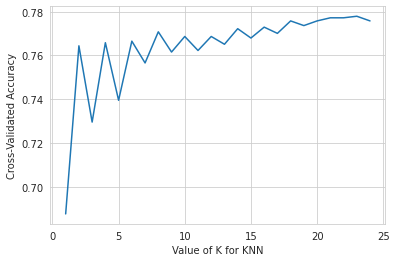

In [ ]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

* Corremos el modelo con el parámetro obtenido

In [ ]:
knn = KNeighborsClassifier(n_neighbors=23,weights='uniform')

In [ ]:
knn.fit(X_train_enc, y_train)

KNeighborsClassifier(n_neighbors=23)

In [ ]:
y_pred_class = knn.predict(X_test_enc)

In [ ]:
print(classification_report(y_test,y_pred_class))

              precision    recall  f1-score   support

           0       0.77      0.99      0.87       273
           1       0.00      0.00      0.00        79

    accuracy                           0.77       352
   macro avg       0.39      0.49      0.43       352
weighted avg       0.60      0.77      0.67       352



* El accuracy de nuestro modelo mejora con el parámetro obtenido, pero a expensas de su performance con las canciones populares. Por lo cual no representa una mejora para el modelo

* Probamos con randomsearch

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
k_range2 = range(1, 25)
param_dist = dict(n_neighbors=k_range2)

In [ ]:
rand = RandomizedSearchCV(knn, param_dist, cv=5, scoring='accuracy', n_iter=5, random_state=5)

In [ ]:
rand.fit(X_train_enc, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=23),
                   n_iter=5, param_distributions={'n_neighbors': range(1, 25)},
                   random_state=5, scoring='accuracy')

In [ ]:
rand.cv_results_

{'mean_fit_time': array([0.00423641, 0.00381622, 0.00407028, 0.00590849, 0.00381498]),
 'std_fit_time': array([0.00091576, 0.00011739, 0.00031097, 0.00347525, 0.00010834]),
 'mean_score_time': array([0.02530966, 0.02119293, 0.0261302 , 0.02428093, 0.02469745]),
 'std_score_time': array([0.0031533 , 0.00124962, 0.00466645, 0.00087957, 0.00128088]),
 'param_n_neighbors': masked_array(data=[21, 3, 18, 19, 20],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 21},
  {'n_neighbors': 3},
  {'n_neighbors': 18},
  {'n_neighbors': 19},
  {'n_neighbors': 20}],
 'split0_test_score': array([0.77935943, 0.72597865, 0.77580071, 0.77935943, 0.78291815]),
 'split1_test_score': array([0.77935943, 0.70462633, 0.77935943, 0.78291815, 0.77935943]),
 'split2_test_score': array([0.77580071, 0.74377224, 0.77224199, 0.76512456, 0.77580071]),
 'split3_test_score': array([0.77580071, 0.73309609, 0.77224199, 0.76868327, 0.7722

In [ ]:
print(rand.best_score_) #single best score achieved across all params 
print(rand.best_params_) #Dictionary containing the parameters (k) used to generate that score
print(rand.best_estimator_) #estimator which gave the highest score 

0.7772241992882563
{'n_neighbors': 21}
KNeighborsClassifier(n_neighbors=21)


* Con randomsearch el resultado obtenido es similar al cv, y sigue estando lejos de una buena performance.

## **Resultados finales**

* Tras descartar la posibilidad de obtener la solución de nuestro problema mediante la predicción exacta de los valroes de popularidad de una canción, creamos una variable target que nos indica si la canción supera o no los 75 puntos de popularidad. De esta manera pasamos a probar algoritmos de clasificación y agrupamiento.

* A continuación se detallan los reportes de clasificación obtenidos con cada uno de los algaritmos utilizados.

In [ ]:
print("RL",classification_report(y_test, y_pred_rl))
print("RF",classification_report(y_test, y_pred_rfc))
print("BG",classification_report(y_test, y_pred_bag))
print("XG",classification_report(y_test, y_pred_xgb))
print("KN",classification_report(y_test, y_pred_knn))

RL               precision    recall  f1-score   support

           0       0.84      0.63      0.72       273
           1       0.32      0.59      0.41        79

    accuracy                           0.62       352
   macro avg       0.58      0.61      0.57       352
weighted avg       0.73      0.62      0.65       352

RF               precision    recall  f1-score   support

           0       0.81      0.97      0.88       273
           1       0.65      0.19      0.29        79

    accuracy                           0.80       352
   macro avg       0.73      0.58      0.59       352
weighted avg       0.77      0.80      0.75       352

BG               precision    recall  f1-score   support

           0       0.82      0.92      0.87       273
           1       0.51      0.28      0.36        79

    accuracy                           0.78       352
   macro avg       0.66      0.60      0.61       352
weighted avg       0.75      0.78      0.75       352

XG        

In [ ]:
print("RL",confusion_matrix(y_test, y_pred_rl))
print("RF",confusion_matrix(y_test, y_pred_rfc))
print("BG",confusion_matrix(y_test, y_pred_bag))
print("XG",confusion_matrix(y_test, y_pred_xgb))
print("KN",confusion_matrix(y_test, y_pred_knn))

RL [[172 101]
 [ 32  47]]
RF [[265   8]
 [ 64  15]]
BG [[252  21]
 [ 57  22]]
XG [[256  17]
 [ 57  22]]
KN [[213  60]
 [ 51  28]]


* De los resultados obtenidos, vemos que los que mejor accuracy tienen son el random forest, el modelo de bagging y el de boosting. Sin embargo el recall de estos modelos no es muy bueno, ya que de 79 canciones populares en el conjunto test solo predijeron 15, 22 y 22 respectivamente. En cambio el modelo de regresión logística, si bien tiene menor accuracy, es más parejo en sus resultados. De las 79 canciones populares en el conjunto test, predijo correctamente 47, sin embargo se equivocó 100 veces con las canciones no populares lo que hace que se resultado global sea malo.

__________________________________________________________


### Predicción de popularidad